# 1º Etapa - Análise exploratória dos dados
 - Excluir coluna vazia e colunas de data
 - Formatar os dados para o tipo numérico
 - Renomear colunas 
 - Identificação e tratamento de outliers
 - Preenchimento de dados faltantes através de interpolação polinomial
 

In [ ]:
#Importando as bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
#Importando a base de dados e analisando seu cabeçalho
df = pd.read_csv("/content/Dados Brutos.csv")
df.head()

,Datein,FR(m3/dia),BODin (ppm),CODin (ppm),SSin(ppm),pHin,NAmin(ppm),NNin (ppm),Pin (ppm),Colin(ppm),Tin(°C),Condin L1,RF(mm),Pulp(ton/dia),Pap (ton/dia),Unnamed: 15,Dateout,BODout(ppm),CODout (ppm),SSout(ppm),Colout(ppm),Tout(°C),Condout,FRout(m3/dia)
0,9/1/1996,79757,236,465.0,NaN,"6,65",NaN,NaN,NaN,356.0,NaN,1180.0,"4,8","878,13","962,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/2/1996,78818,270,483.0,NaN,"6,04",NaN,"0,26",NaN,433.0,43,1230.0,"1,5","925,6","986,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9/3/1996,82039,292,571.0,NaN,"5,39",NaN,"0,29",NaN,287.0,"43,5",1030.0,"39,7","972,6",1065,NaN,9/3/1996,74,245.0,NaN,311.0,"33,5",1190.0,84097.0
3,9/4/1996,79501,264,461.0,NaN,"5,92",NaN,"0,75",NaN,406.0,43,1150.0,"0,8","744,481","879,7",NaN,9/4/1996,88,237.0,NaN,298.0,33,1140.0,79542.0
4,9/5/1996,82461,299,471.0,181.0,"6,11",NaN,NaN,NaN,406.0,43,1210.0,"26,1","891,033","985,8",NaN,9/5/1996,67,221.0,37.0,297.0,33,1115.0,83814.0


In [ ]:
#Exluindo uma coluna vazia
df = df.drop(['Unnamed: 15'],axis =1)

In [ ]:
#Identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 1430
Variáveis:	 23



In [ ]:
#Identificando os tipos das variáveis
display(df.dtypes)

Datein            object
FR(m3/dia)         int64
BODin (ppm)       object
CODin (ppm)      float64
SSin(ppm)        float64
pHin              object
NAmin(ppm)        object
NNin (ppm)        object
Pin (ppm)         object
Colin(ppm)       float64
Tin(°C)           object
Condin L1        float64
RF(mm)            object
Pulp(ton/dia)     object
Pap (ton/dia)     object
Dateout           object
BODout(ppm)       object
CODout (ppm)     float64
SSout(ppm)       float64
Colout(ppm)      float64
Tout(°C)          object
Condout          float64
FRout(m3/dia)    float64
dtype: object

In [ ]:
# Transformando as variáveis de data no formato de data
df['Datein'] = pd.to_datetime(df['Datein'])
df['Dateout'] = pd.to_datetime(df['Dateout'])
display(df.dtypes)

Datein           datetime64[ns]
FR(m3/dia)                int64
BODin (ppm)              object
CODin (ppm)             float64
SSin(ppm)               float64
pHin                     object
NAmin(ppm)               object
NNin (ppm)               object
Pin (ppm)                object
Colin(ppm)              float64
Tin(°C)                  object
Condin L1               float64
RF(mm)                   object
Pulp(ton/dia)            object
Pap (ton/dia)            object
Dateout          datetime64[ns]
BODout(ppm)              object
CODout (ppm)            float64
SSout(ppm)              float64
Colout(ppm)             float64
Tout(°C)                 object
Condout                 float64
FRout(m3/dia)           float64
dtype: object

In [ ]:
#Transformando as demais variáveis em valores numéricos
df['FR(m3/dia)'] = df['FR(m3/dia)'].astype(float)
df['BODin (ppm)'] = df['BODin (ppm)'].str.replace(',','.').astype(float)
df['pHin'] = df['pHin'].str.replace(',','.').astype(float)
df['NAmin(ppm)'] = df['NAmin(ppm)'].str.replace(',','.').astype(float)
df['NNin (ppm)'] = df['NNin (ppm)'].str.replace(',','.').astype(float)
df['Pin (ppm)'] = df['Pin (ppm)'].str.replace(',','.').astype(float)
df['Tin(°C)'] = df['Tin(°C)'].str.replace(',','.').astype(float)
df['RF(mm)'] = df['RF(mm)'].str.replace(',','.').astype(float)
df['Pulp(ton/dia)'] = df['Pulp(ton/dia)'].str.replace(',','.').astype(float)
df['Pap (ton/dia)'] = df['Pap (ton/dia)'].str.replace(',','.').astype(float)
df['BODout(ppm)'] = df['BODout(ppm)'].str.replace(',','.').astype(float)
df['Tout(°C)'] = df['Tout(°C)'].str.replace(',','.').astype(float)

In [ ]:
display(df.dtypes)

Datein           datetime64[ns]
FR(m3/dia)              float64
BODin (ppm)             float64
CODin (ppm)             float64
SSin(ppm)               float64
pHin                    float64
NAmin(ppm)              float64
NNin (ppm)              float64
Pin (ppm)               float64
Colin(ppm)              float64
Tin(°C)                 float64
Condin L1               float64
RF(mm)                  float64
Pulp(ton/dia)           float64
Pap (ton/dia)           float64
Dateout          datetime64[ns]
BODout(ppm)             float64
CODout (ppm)            float64
SSout(ppm)              float64
Colout(ppm)             float64
Tout(°C)                float64
Condout                 float64
FRout(m3/dia)           float64
dtype: object

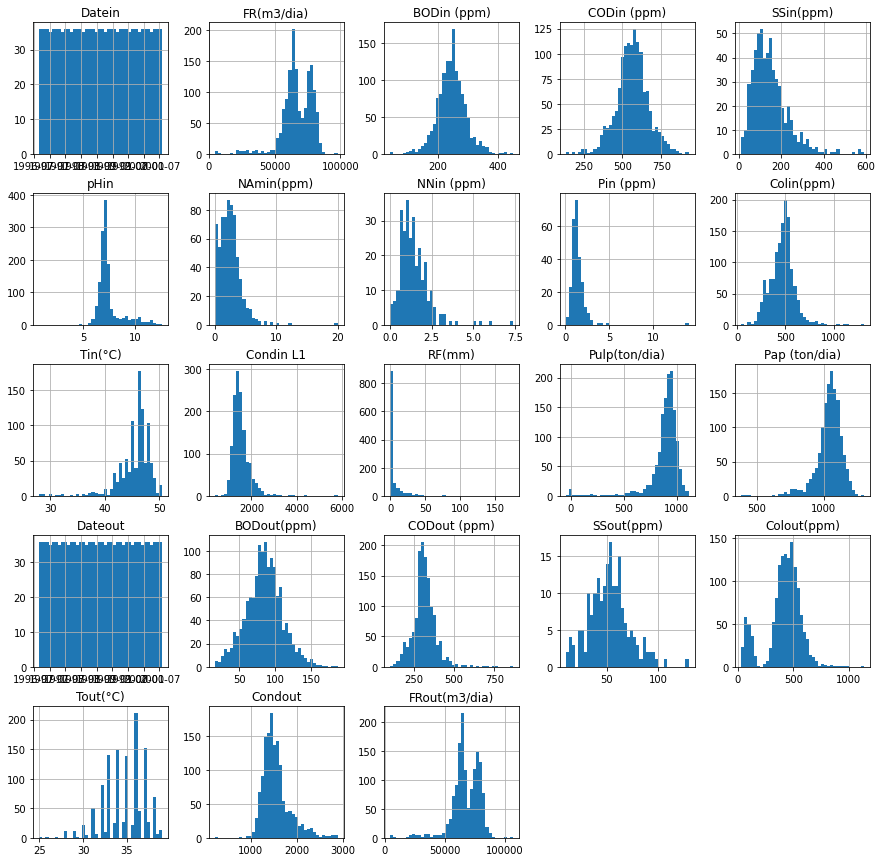

In [ ]:
#Visualizando a distribuição de variáveis para identificar outliers
df.hist(bins=40, figsize=(15,15));

In [ ]:
# Para uma melhor análise, é possível obter um resumo estatístico das variáveis.
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df.describe())

         FR(m3/dia)  BODin (ppm)  CODin (ppm)   SSin(ppm)         pHin  \
count   1430.000000  1341.000000  1341.000000  568.000000  1377.000000   
mean   67358.606993   245.124787   561.387025  149.195423     7.450612   
std    11592.806906    46.345313   104.162825   85.737770     1.208718   
min     4474.000000    41.000000   136.000000   12.000000     0.850000   
25%    62056.500000   219.000000   502.000000   90.000000     6.840000   
50%    66538.000000   245.000000   563.000000  133.000000     7.110000   
75%    76541.000000   271.000000   621.000000  186.250000     7.470000   
max    97850.000000   449.000000   925.000000  591.000000    12.530000   

       NAmin(ppm)  NNin (ppm)   Pin (ppm)   Colin(ppm)     Tin(°C)  \
count  660.000000  279.000000  260.000000  1379.000000  963.000000   
mean     2.446463    1.432992    1.405152   464.403916   45.448629   
std      1.766139    0.883582    0.995628   123.522396    3.067845   
min      0.000000    0.030000    0.050000    41.00000

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

SSout(ppm)       0.865734
Pin (ppm)        0.818182
NNin (ppm)       0.804895
SSin(ppm)        0.602797
NAmin(ppm)       0.538462
Tin(°C)          0.326573
RF(mm)           0.178322
Tout(°C)         0.137063
Pulp(ton/dia)    0.072028
Pap (ton/dia)    0.064336
BODin (ppm)      0.062238
CODin (ppm)      0.062238
BODout(ppm)      0.060839
CODout (ppm)     0.059441
Condin L1        0.039161
pHin             0.037063
Colin(ppm)       0.035664
Condout          0.031469
Colout(ppm)      0.030070
FRout(m3/dia)    0.001399
Dateout          0.001399
FR(m3/dia)       0.000000
Datein           0.000000
dtype: float64

In [ ]:
#Excluindo as colunas de Datas
df = df.drop(['Datein','Dateout'],axis =1)

In [ ]:
#Renomeando as colunas do DataFrame para remoção dos outliers
df_clean = df.copy()
df_clean = df_clean.rename(columns = {"FR(m3/dia)": "fr","FRout(m3/dia)": "frout","BODin (ppm)":"BODin","BODout(ppm)":"BODout","CODin (ppm)": "CODin","CODout (ppm)":"CODout",
                                      "SSin(ppm)":"SSin","SSout(ppm)":"SSout","NAmin(ppm)":"NAmin","NNin (ppm)":"NNin","Pin (ppm)":"Pin","Colin(ppm)":"Colin","Colout(ppm)":"Colout",
                                      "Tin(°C)":"Tin","Tout(°C)":"Tout", "RF(mm)":"RF","Pulp(ton/dia)":"Pulp","Pap (ton/dia)":"Pap","Condin L1":"Condin"})


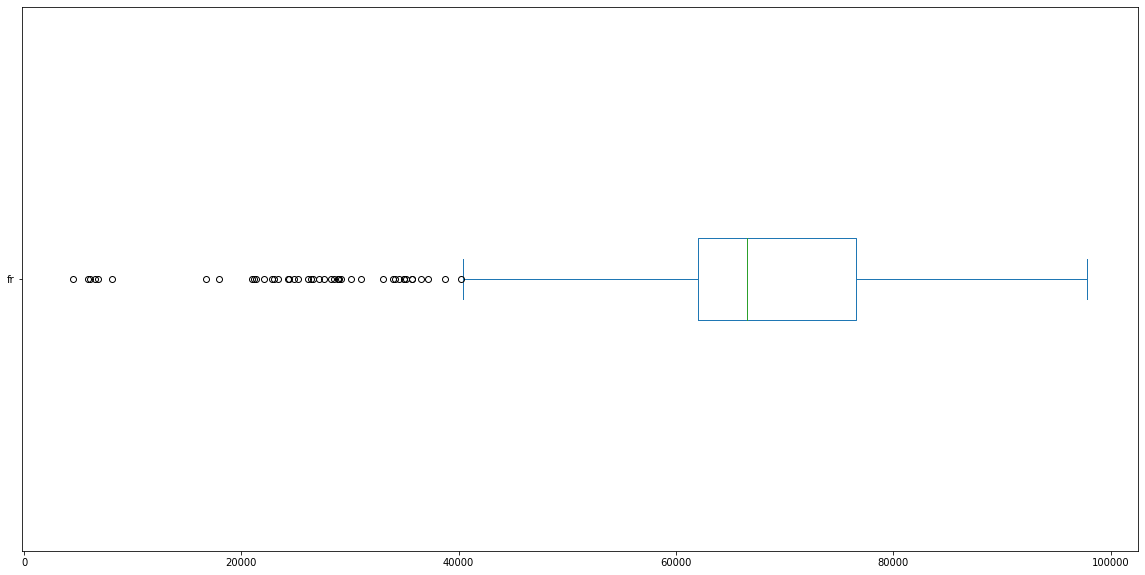

In [ ]:
# Ainda na mesma análise, faremos um boxplot para cada variável para remoção de outliers.
#Para o FR
df_clean.fr.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

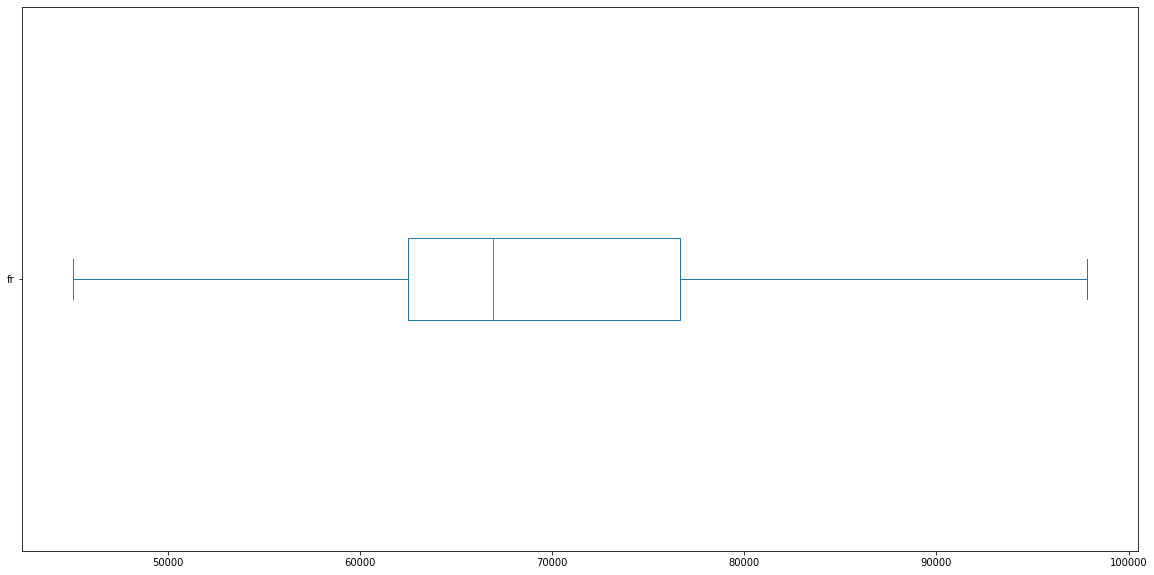

In [ ]:
#Removendo os outliers do fr
df_clean.drop(df_clean[df_clean.fr < 45000].index, axis = 0, inplace = True)
df_clean.fr.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

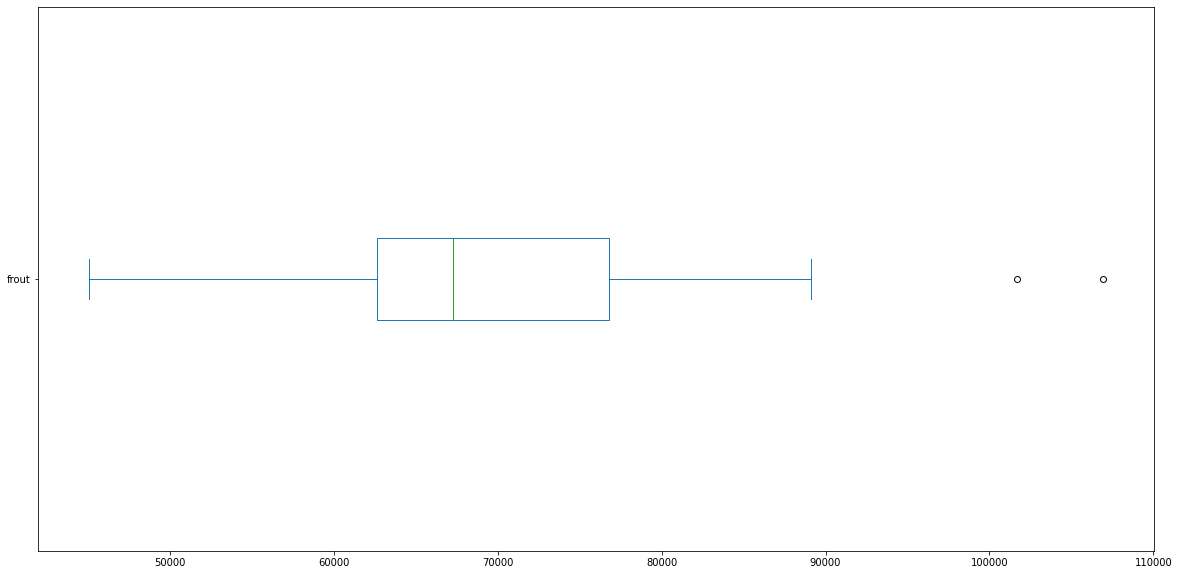

In [ ]:
#Para o FRout
df_clean.frout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

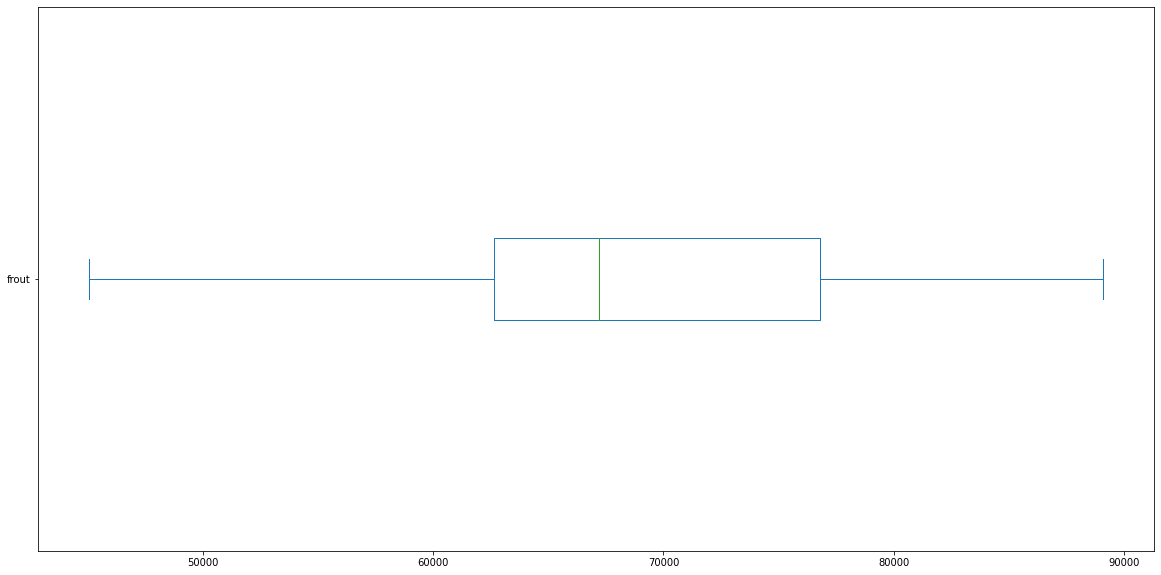

In [ ]:
#Removendo os outliers do FRout
df_clean.drop(df_clean[df_clean.frout > 90000].index, axis = 0, inplace = True)
df_clean.frout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

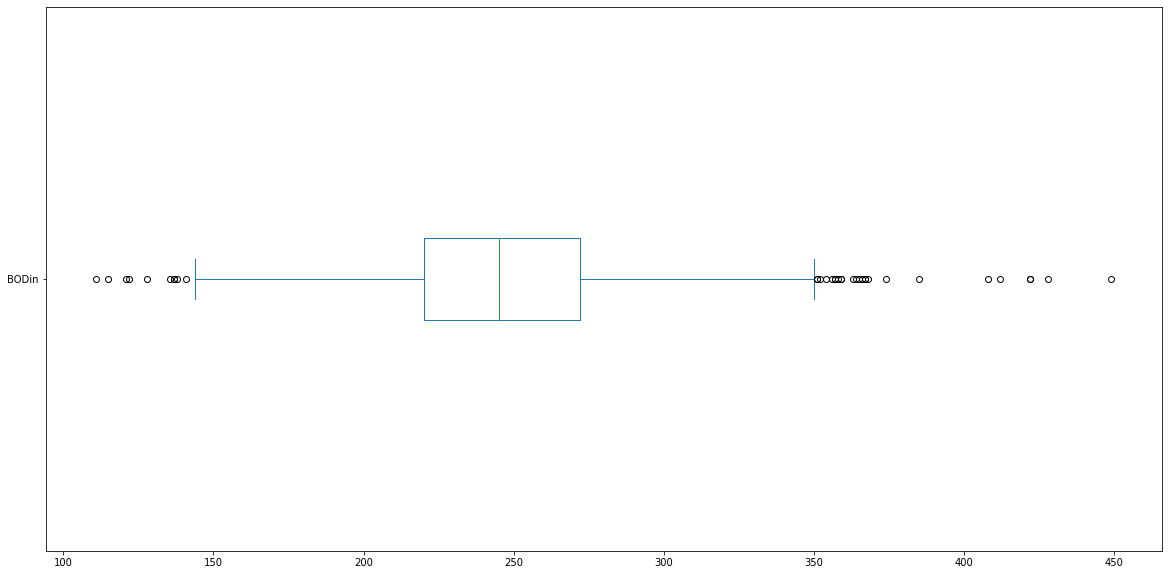

In [ ]:
#Para o BODin
df_clean.BODin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

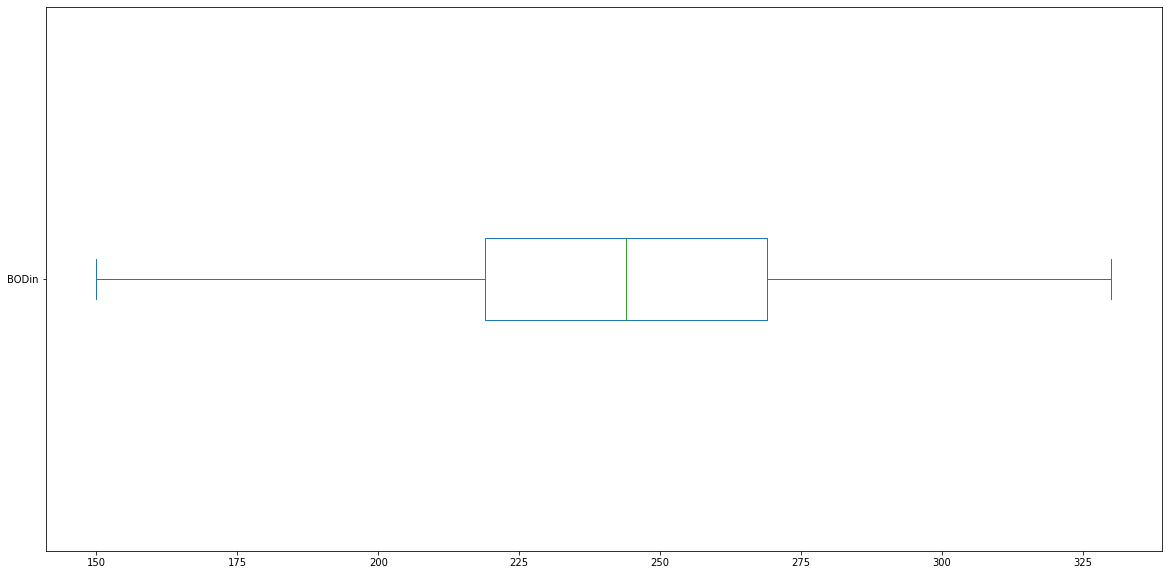

In [ ]:
#Removendo os outliers do BODin
df_clean.drop(df_clean[df_clean.BODin < 150].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.BODin > 330].index, axis = 0, inplace = True)
df_clean.BODin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

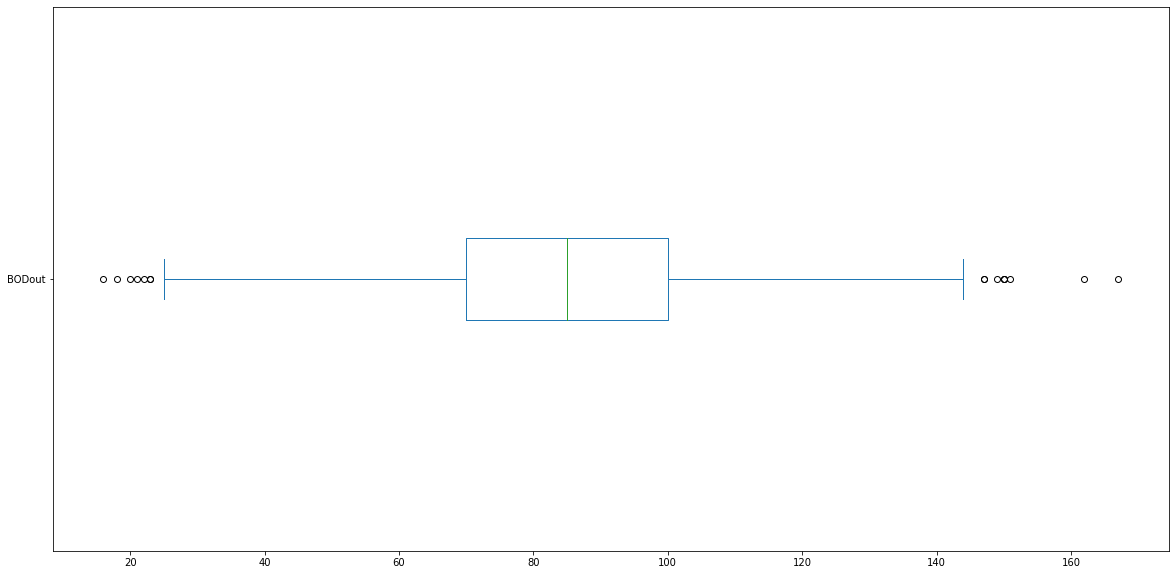

In [ ]:
#Para o BODout
df_clean.BODout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

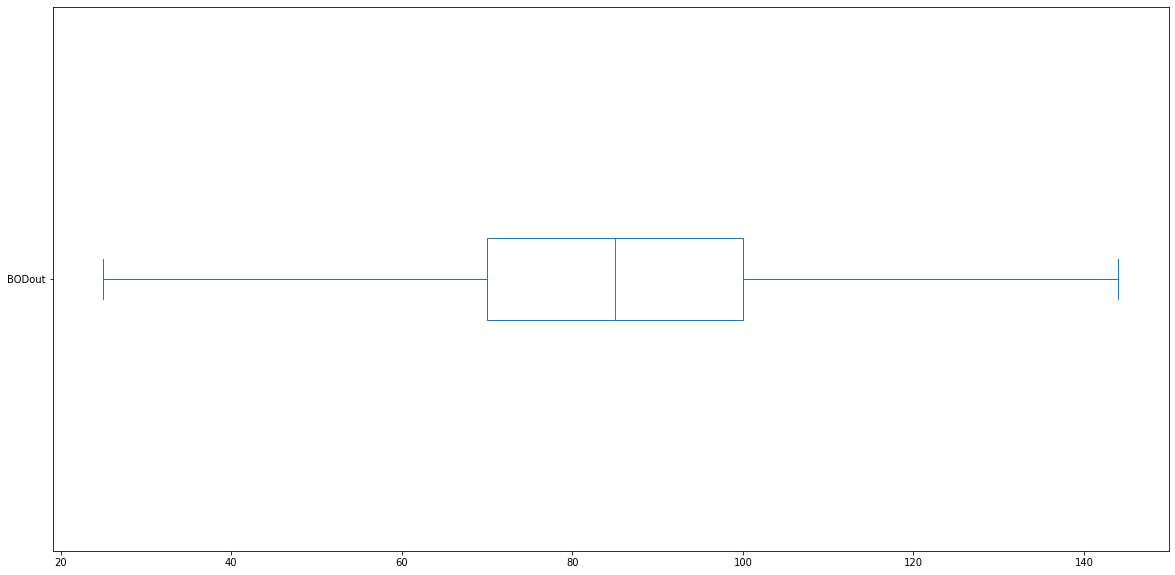

In [ ]:
#Removendo os outliers do BODout
df_clean.drop(df_clean[df_clean.BODout < 25].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.BODout > 145].index, axis = 0, inplace = True)
df_clean.BODout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

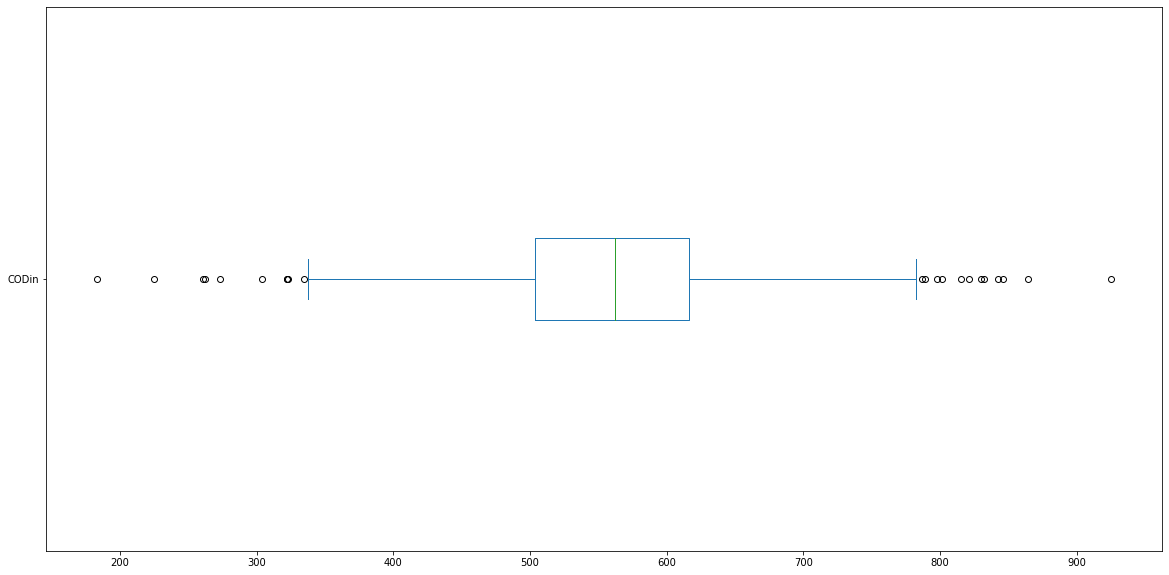

In [ ]:
#Para o CODin
df_clean.CODin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

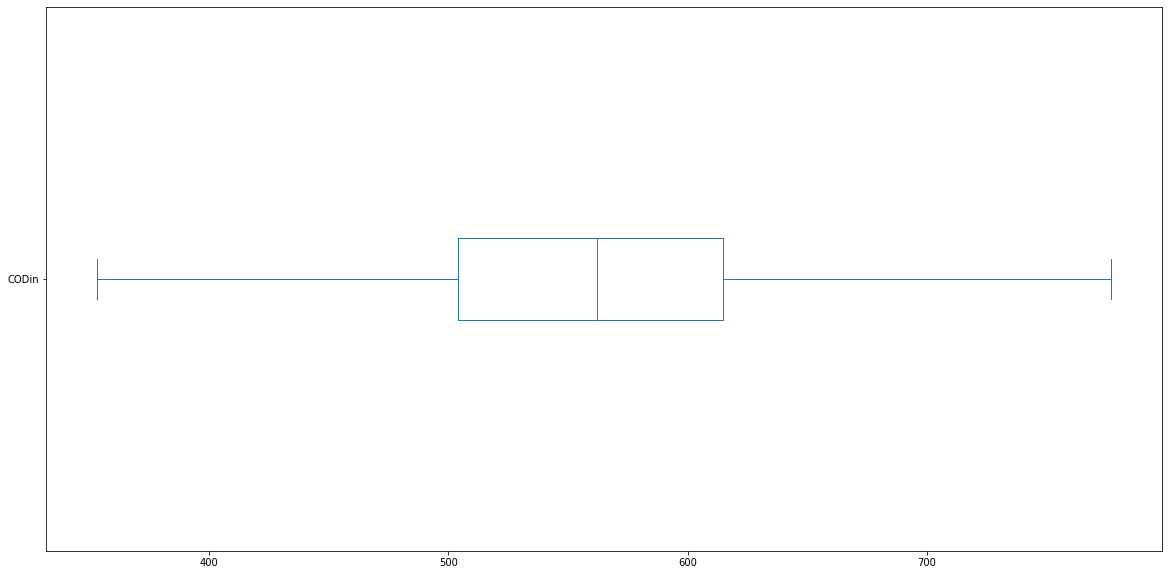

In [ ]:
#Removendo os outliers do CODin
df_clean.drop(df_clean[df_clean.CODin < 350].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.CODin > 780].index, axis = 0, inplace = True)
df_clean.CODin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

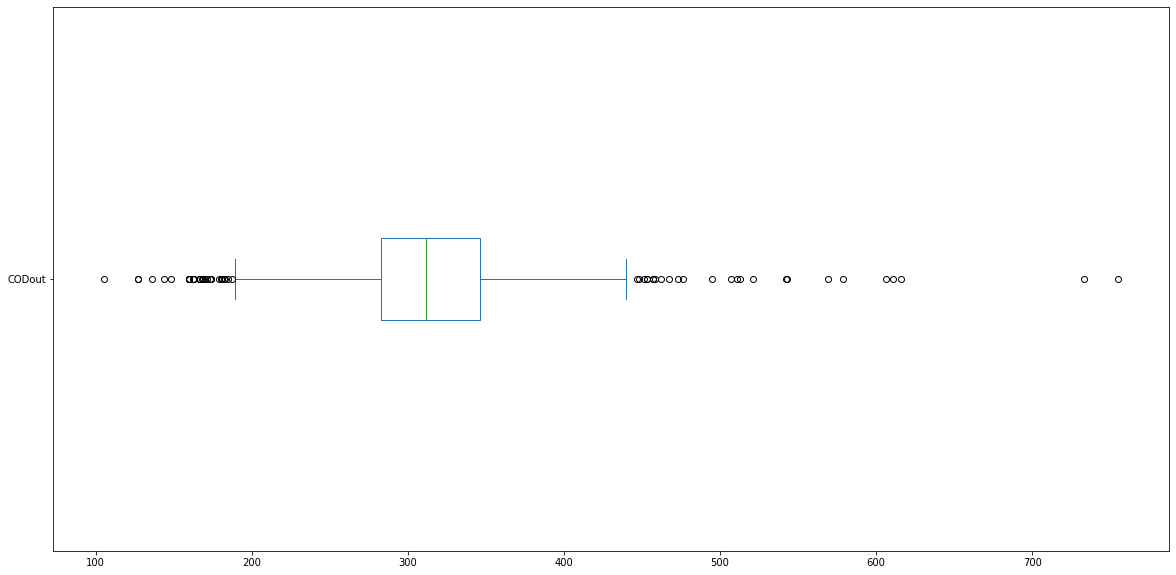

In [ ]:
#Para o CODOUT
df_clean.CODout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

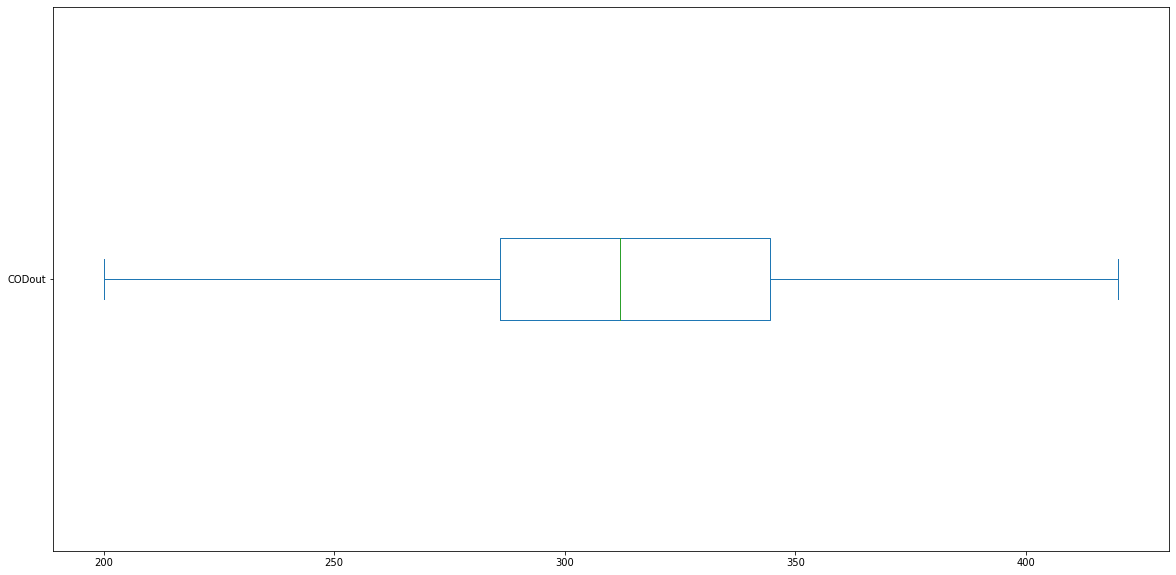

In [ ]:
#Removendo os outliers do CODout
df_clean.drop(df_clean[df_clean.CODout < 200].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.CODout > 420].index, axis = 0, inplace = True)
df_clean.CODout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

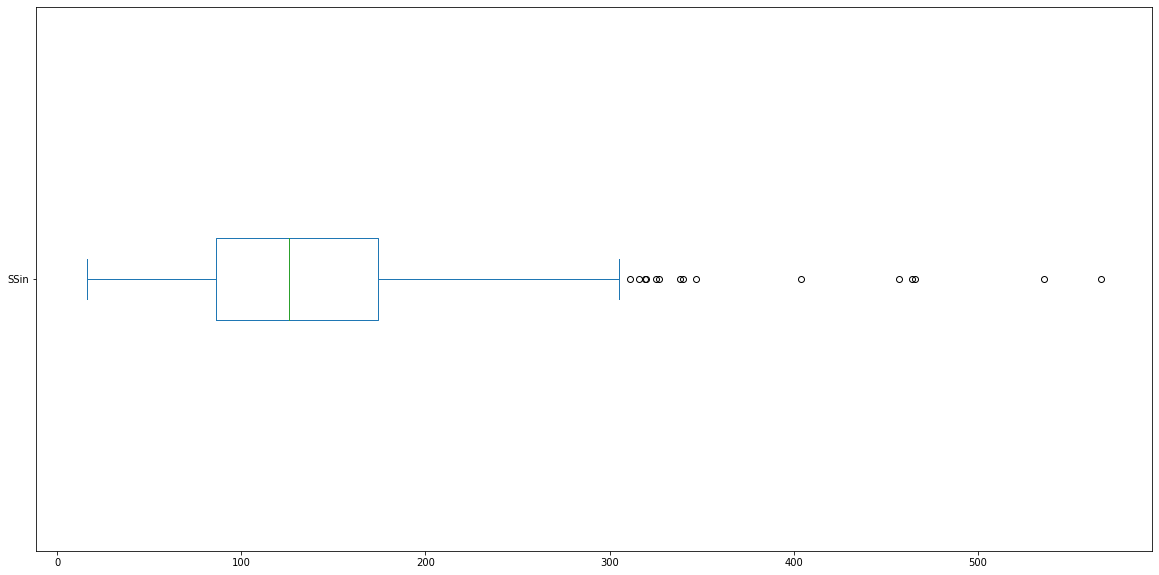

In [ ]:
#Para o SSin
df_clean.SSin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

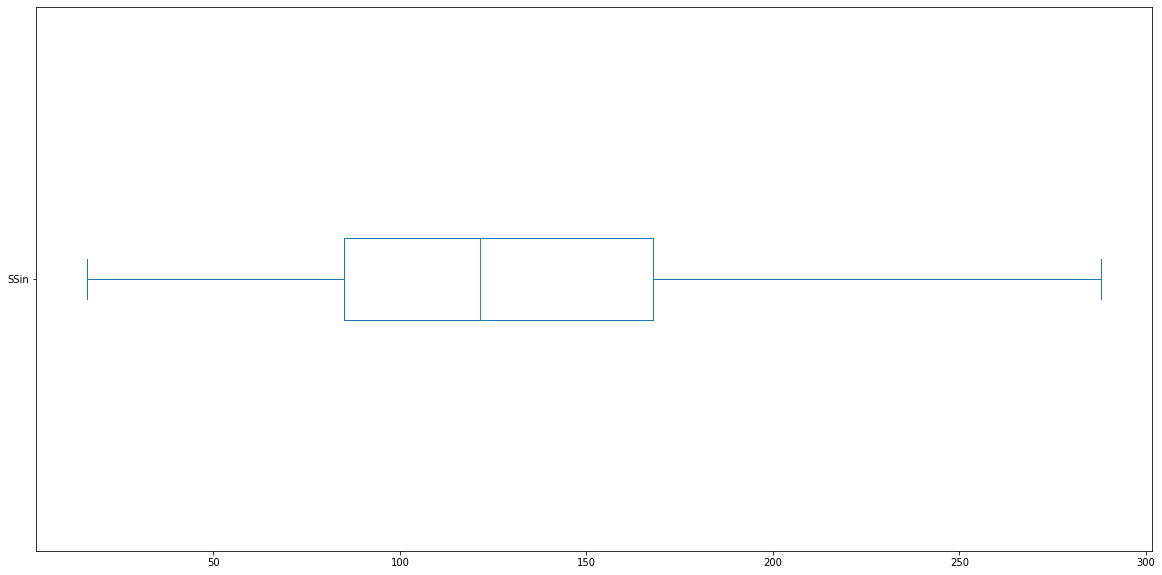

In [ ]:
#Removendo os outliers do SSin
df_clean.drop(df_clean[df_clean.SSin > 290].index, axis = 0, inplace = True)
df_clean.SSin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

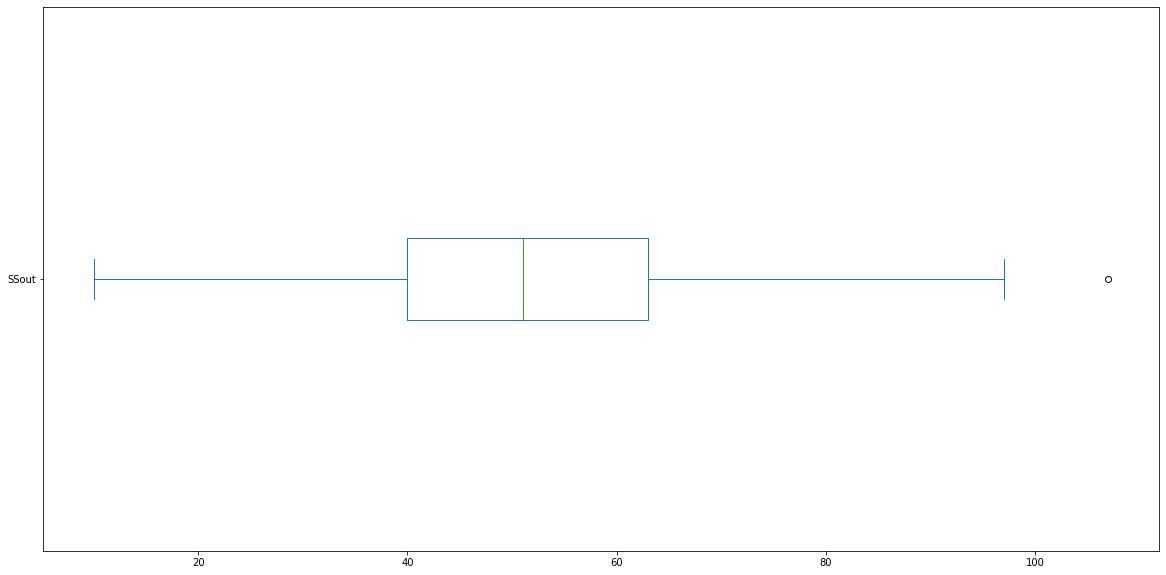

In [ ]:
#Para o SSout
df_clean.SSout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

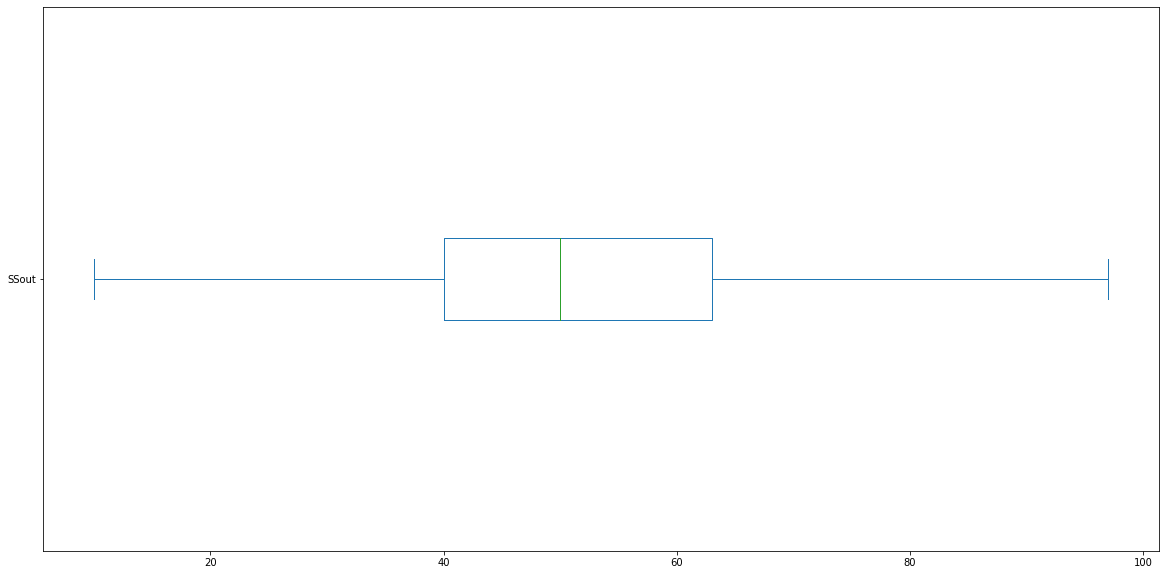

In [ ]:
#Removendo os outliers do SSout
df_clean.drop(df_clean[df_clean.SSout > 100].index, axis = 0, inplace = True)
df_clean.SSout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

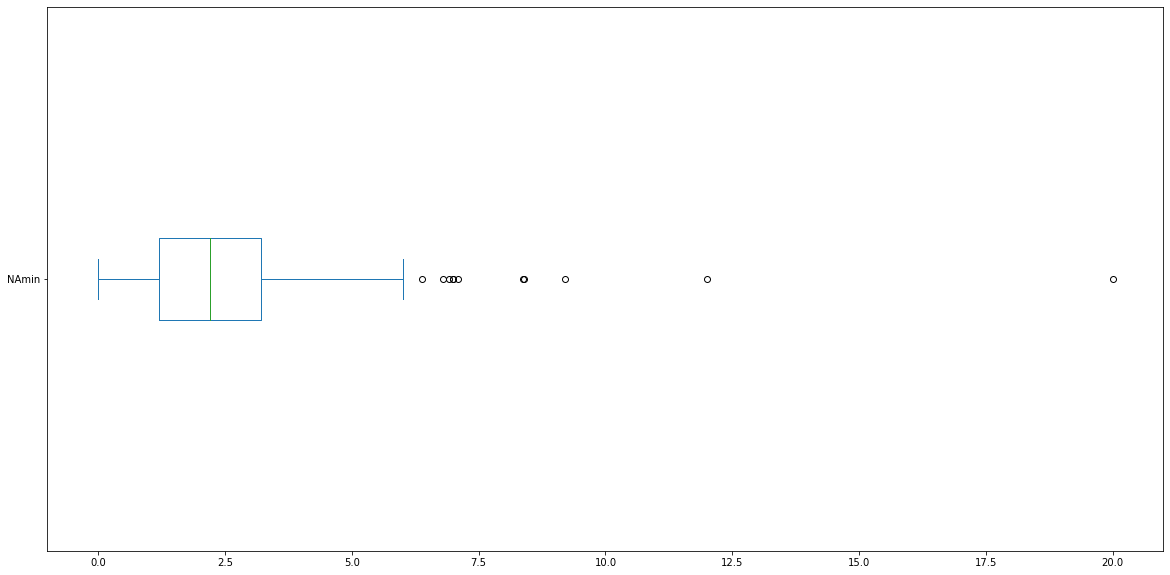

In [ ]:
#Para o NAmin
df_clean.NAmin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

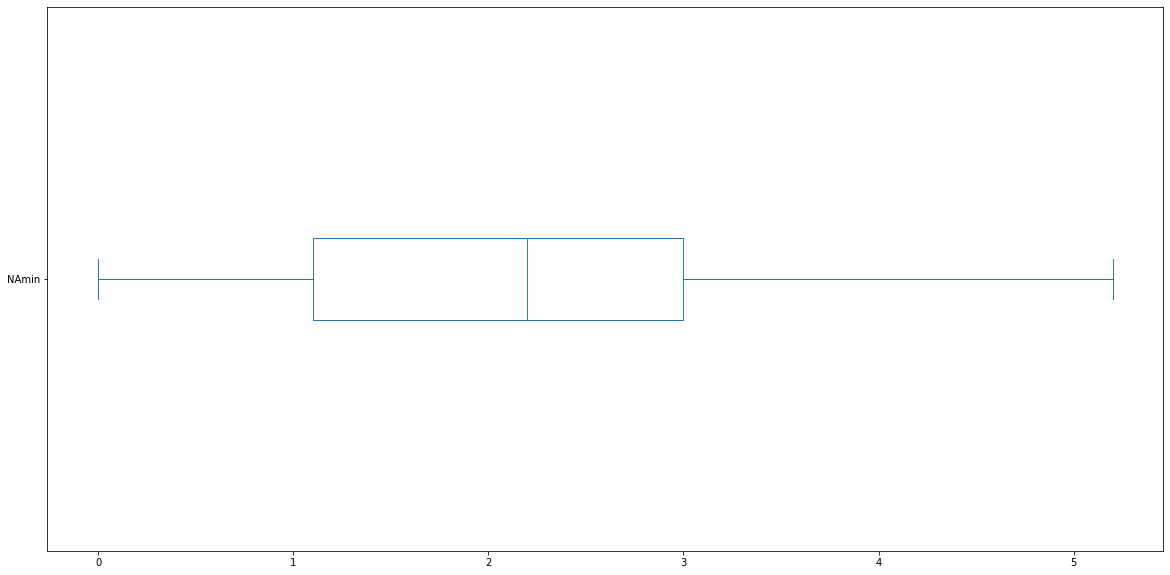

In [ ]:
#Removendo os outliers do NAmin
df_clean.drop(df_clean[df_clean.NAmin > 5.2].index, axis = 0, inplace = True)
df_clean.NAmin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

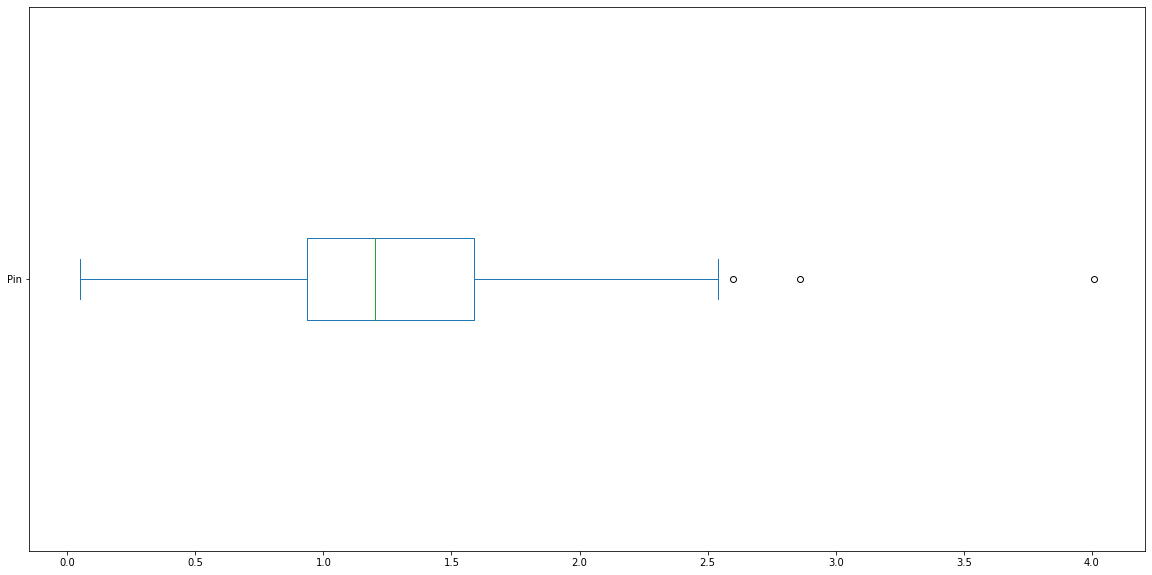

In [ ]:
#Para o Pin
df_clean.Pin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

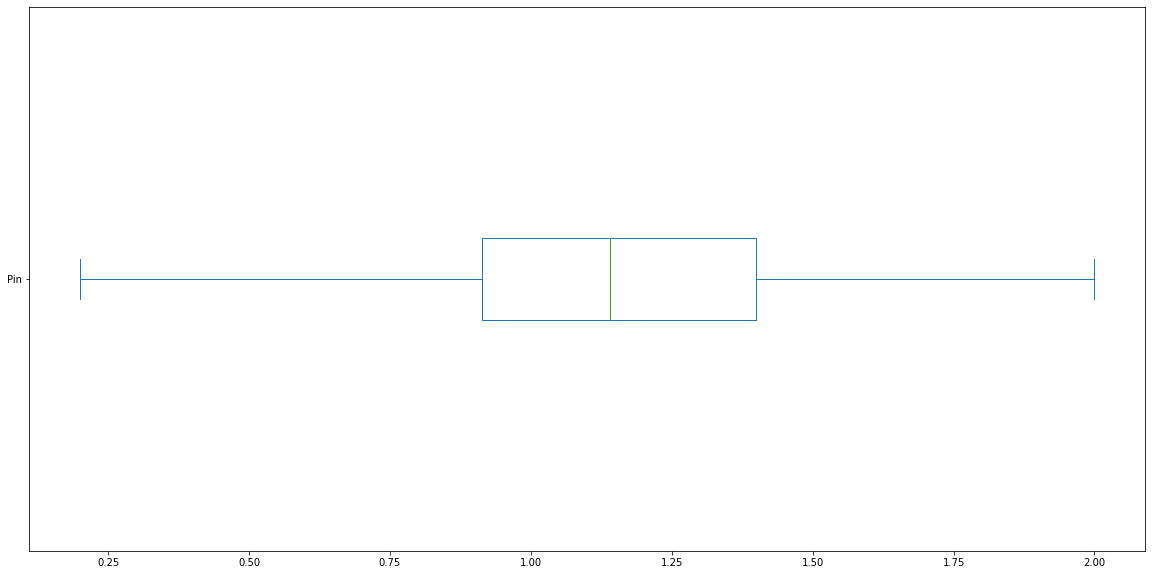

In [ ]:
#Removendo os outliers do Pin
df_clean.drop(df_clean[df_clean.Pin < 0.2].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.Pin > 2.0].index, axis = 0, inplace = True)
df_clean.Pin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

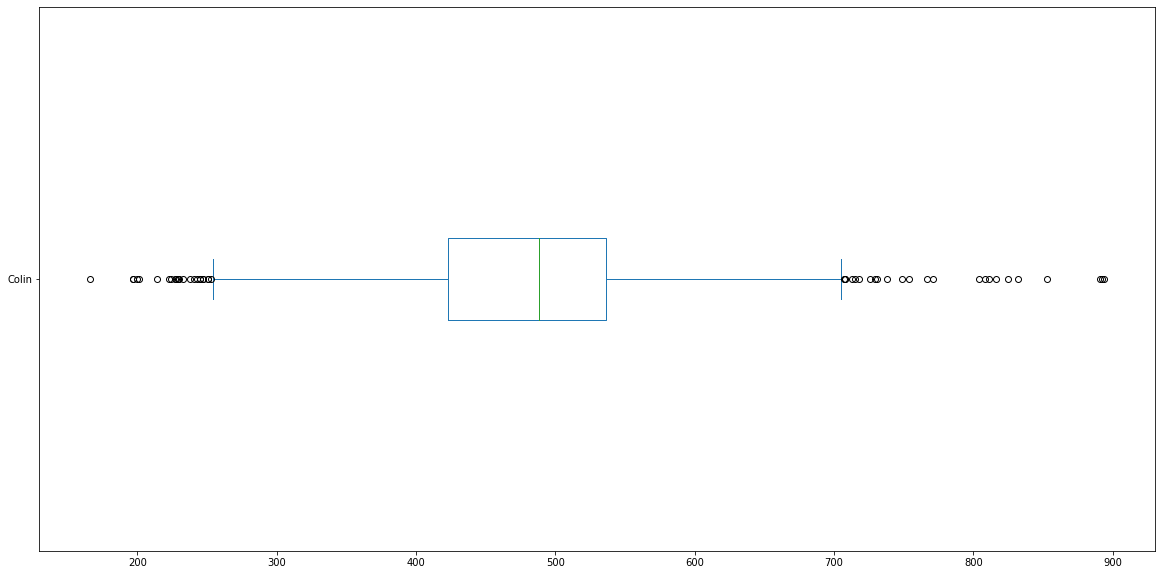

In [ ]:
#Para o Colin
df_clean.Colin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

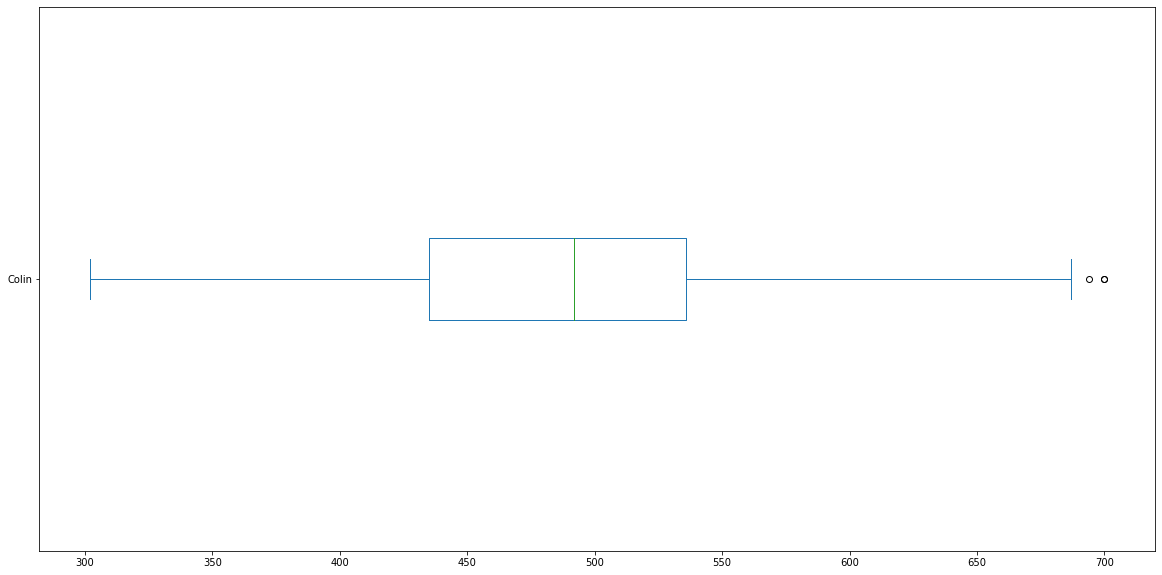

In [ ]:
#Removendo os outliers do Colin
df_clean.drop(df_clean[df_clean.Colin < 300].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.Colin > 700].index, axis = 0, inplace = True)
df_clean.Colin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

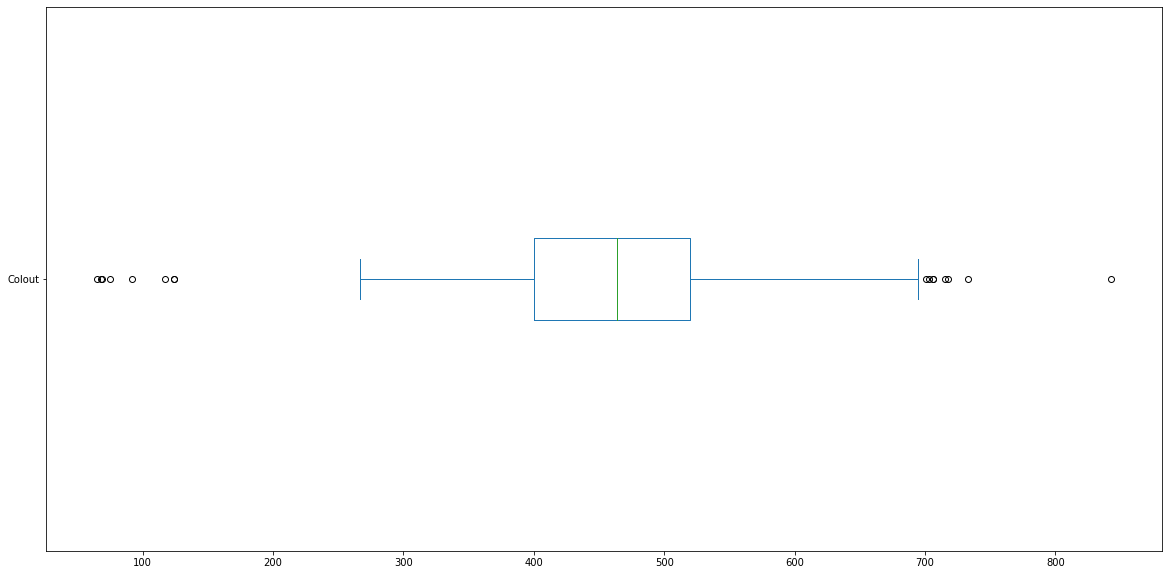

In [ ]:
#Para o Colout
df_clean.Colout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

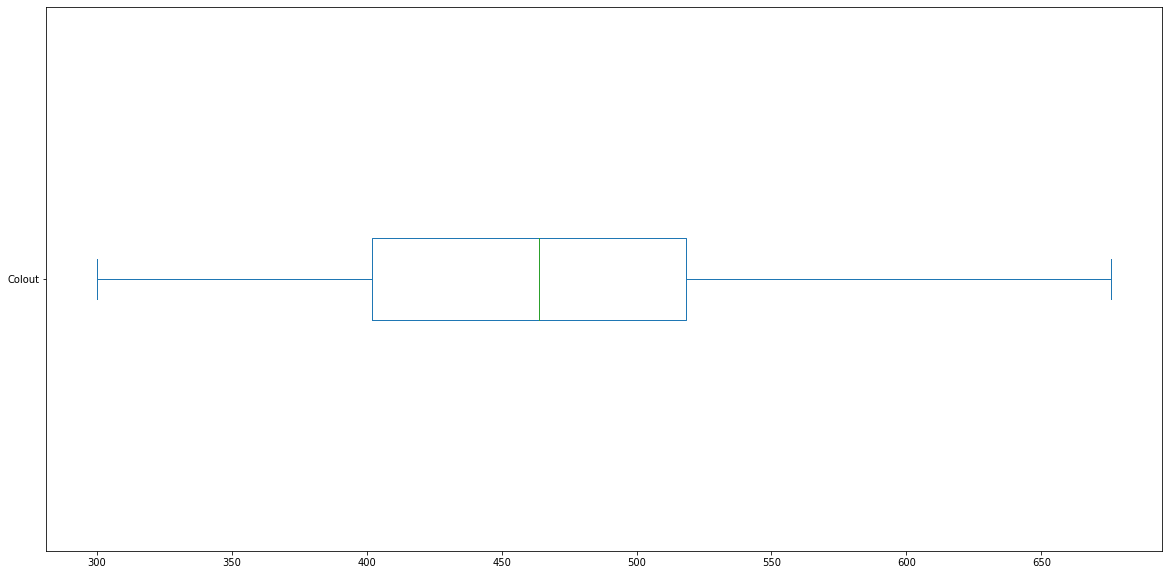

In [ ]:
#Removendo os outliers do Colout
df_clean.drop(df_clean[df_clean.Colout < 300].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.Colout > 680].index, axis = 0, inplace = True)
df_clean.Colout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

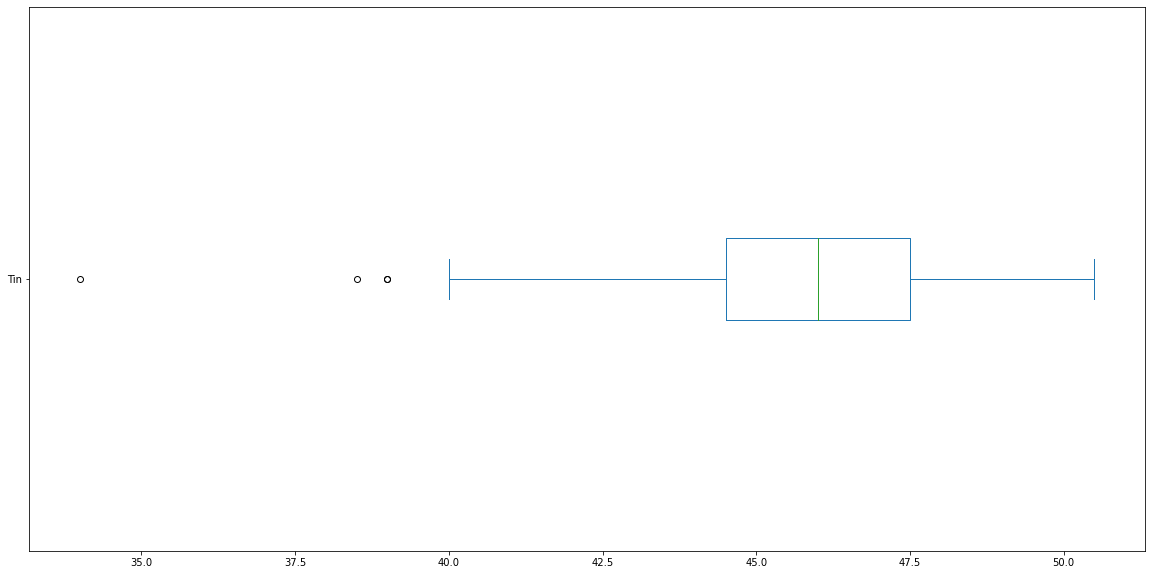

In [ ]:
#Para o Tin
df_clean.Tin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

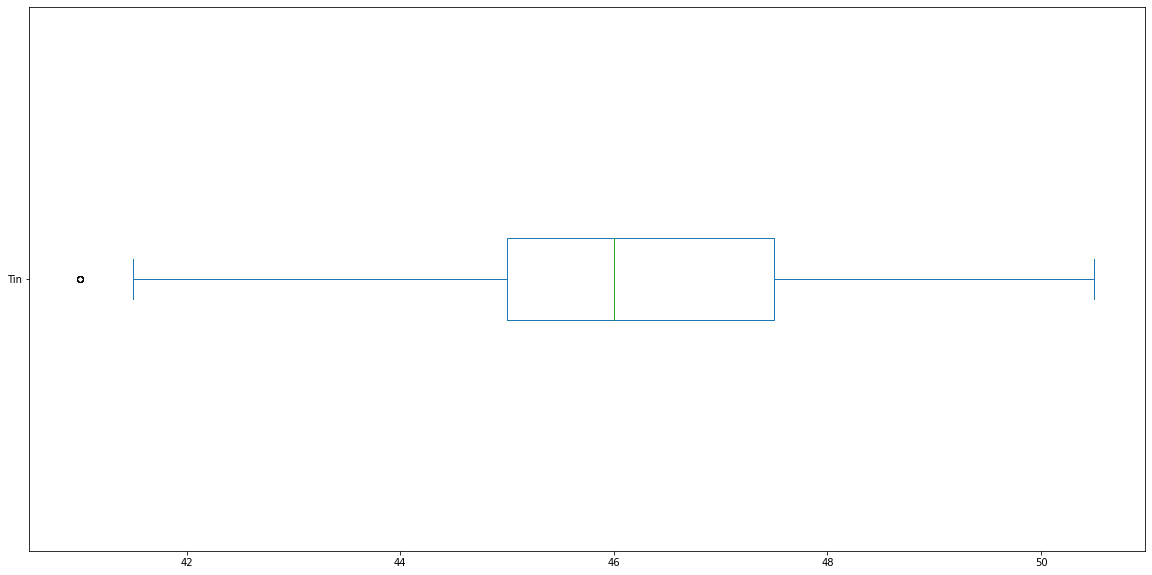

In [ ]:
#Removendo os outliers do Tin
df_clean.drop(df_clean[df_clean.Tin < 41].index, axis = 0, inplace = True)
df_clean.Tin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

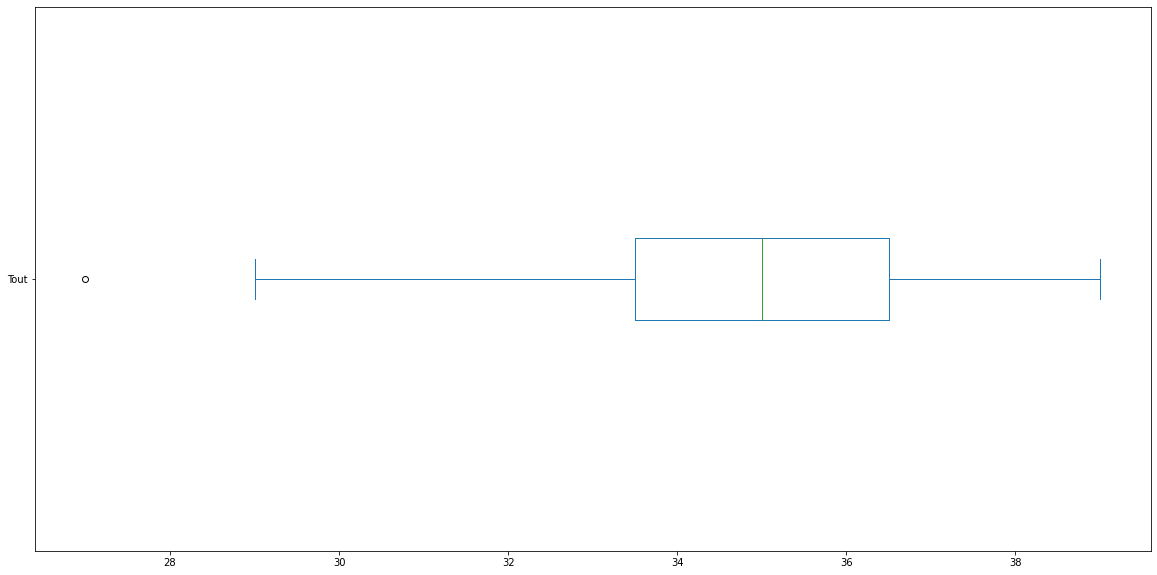

In [ ]:
#Para o Tout
df_clean.Tout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

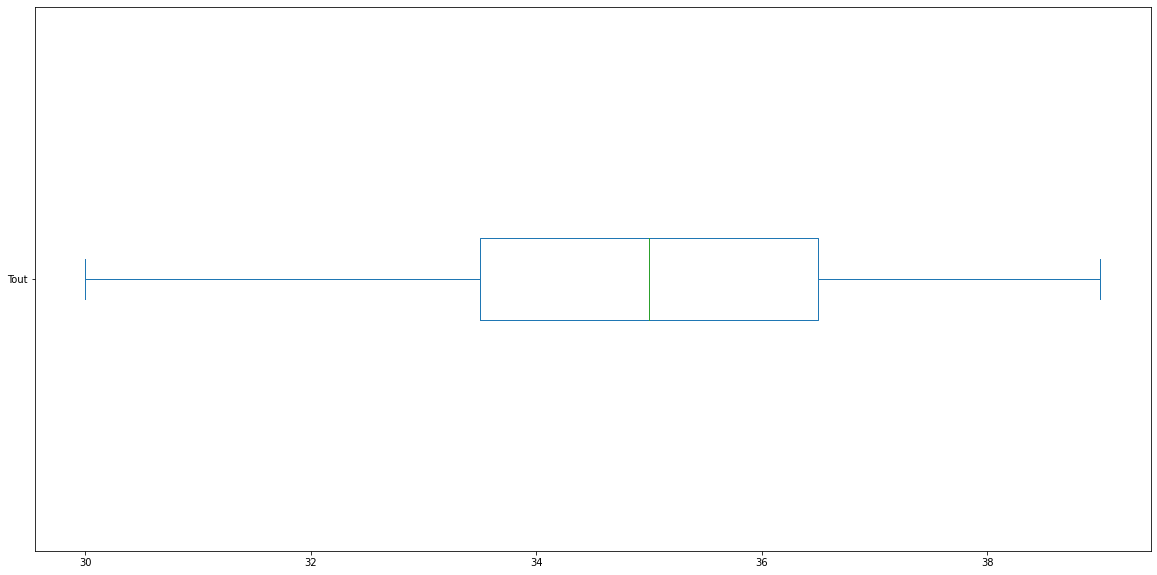

In [ ]:
#Removendo os outliers do Tout
df_clean.drop(df_clean[df_clean.Tout < 30].index, axis = 0, inplace = True)
df_clean.Tout.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

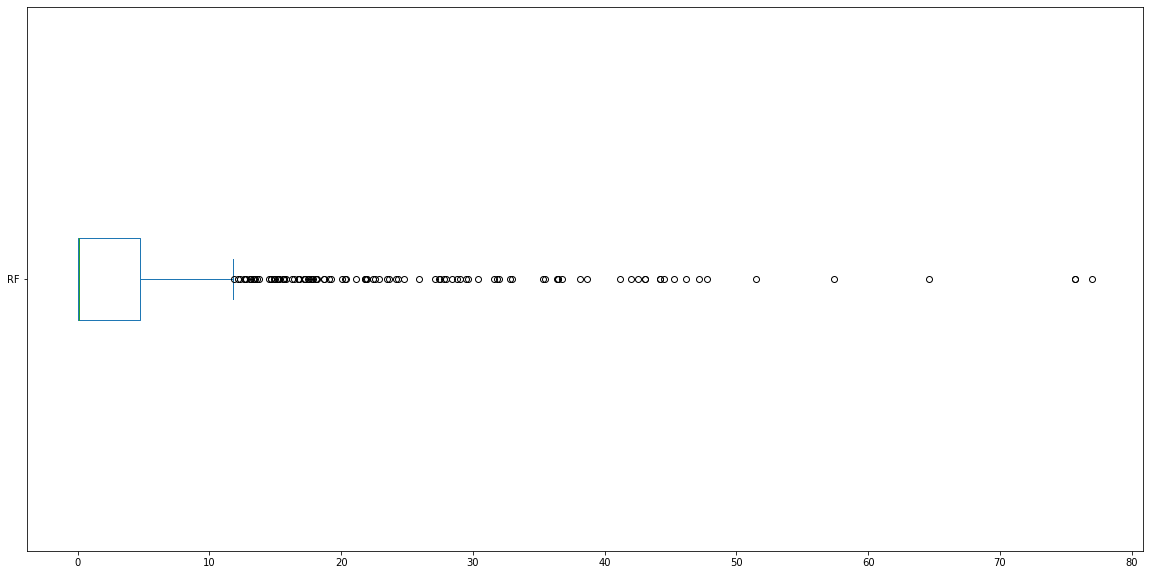

In [ ]:
#Para o RF
df_clean.RF.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

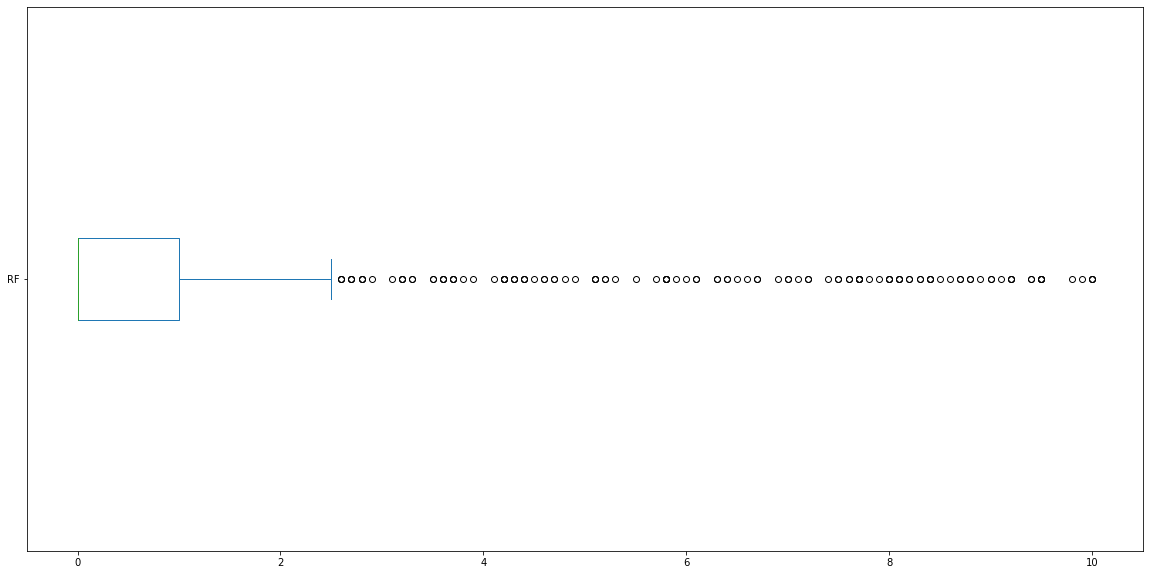

In [ ]:
#Removendo os outliers do RF
df_clean.drop(df_clean[df_clean.RF > 10].index, axis = 0, inplace = True)
df_clean.RF.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

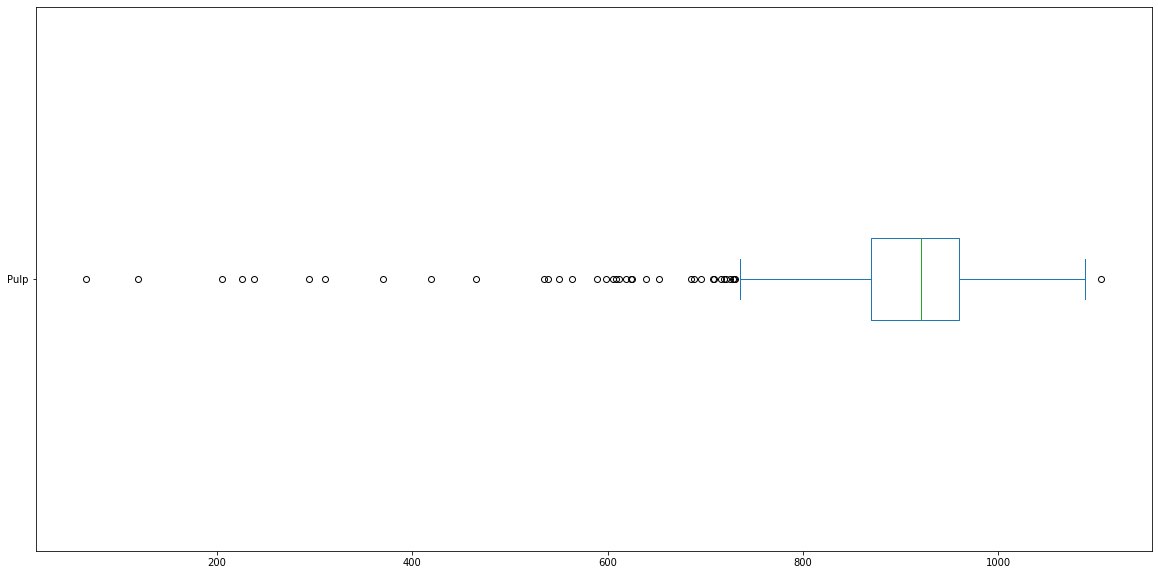

In [ ]:
#Para o Pulp
df_clean.Pulp.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

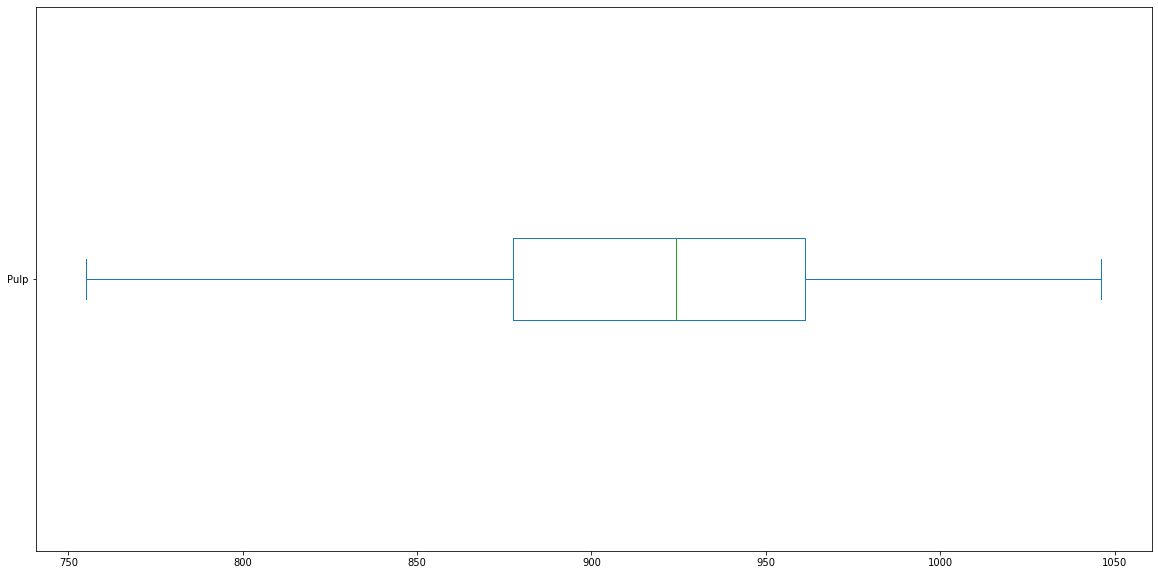

In [ ]:
#Removendo os outliers do Pulp
df_clean.drop(df_clean[df_clean.Pulp < 750].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.Pulp > 1050].index, axis = 0, inplace = True)
df_clean.Pulp.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

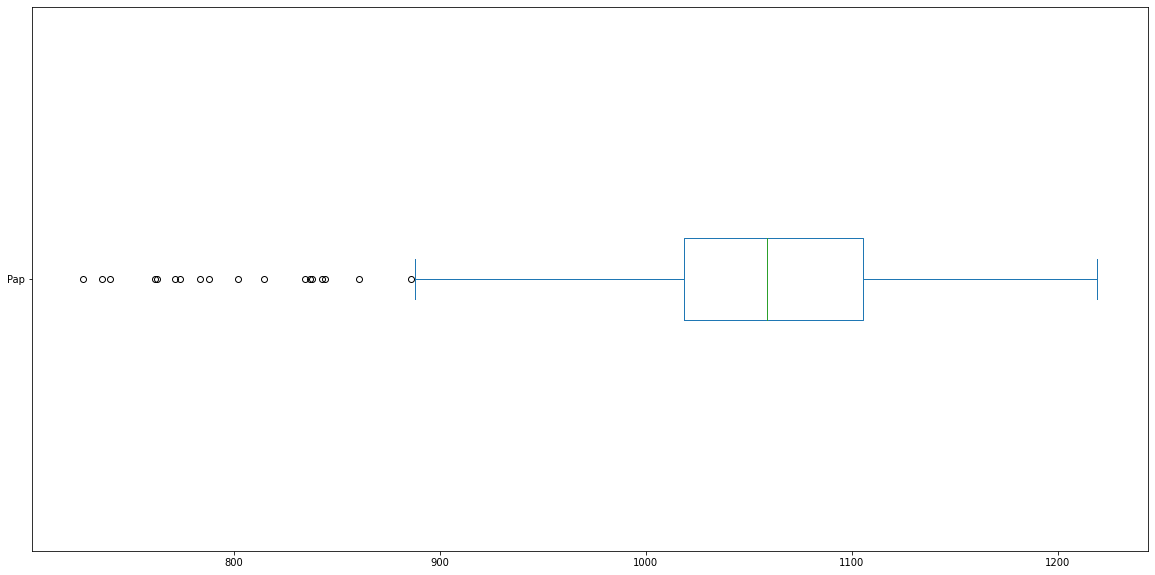

In [ ]:
#Para o Pap
df_clean.Pap.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

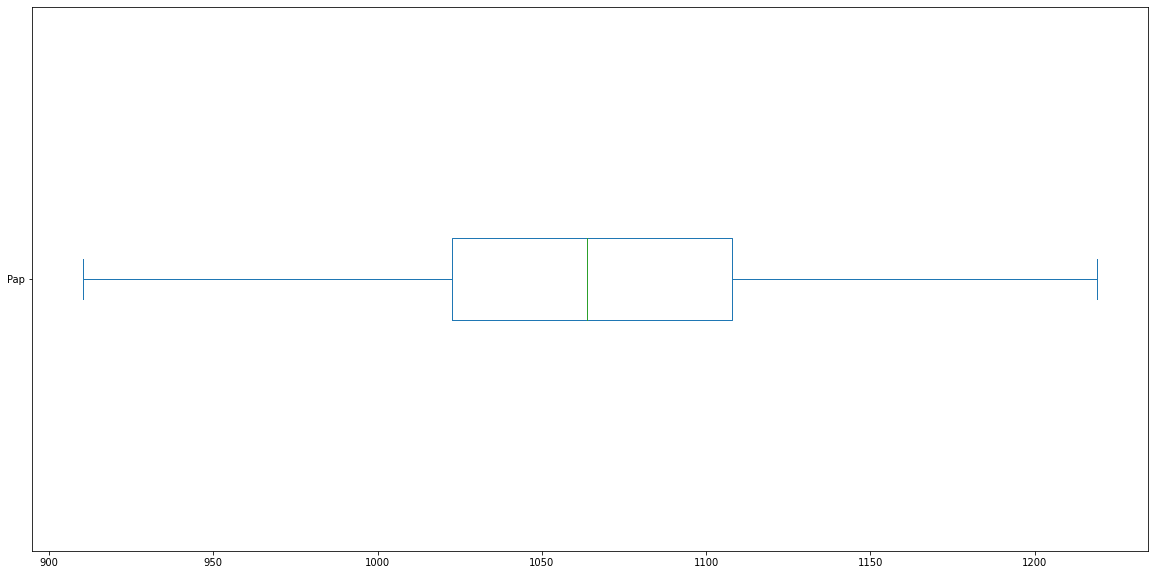

In [ ]:
#Removendo os outliers do Pap
df_clean.drop(df_clean[df_clean.Pap < 910].index, axis = 0, inplace = True)
df_clean.Pap.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

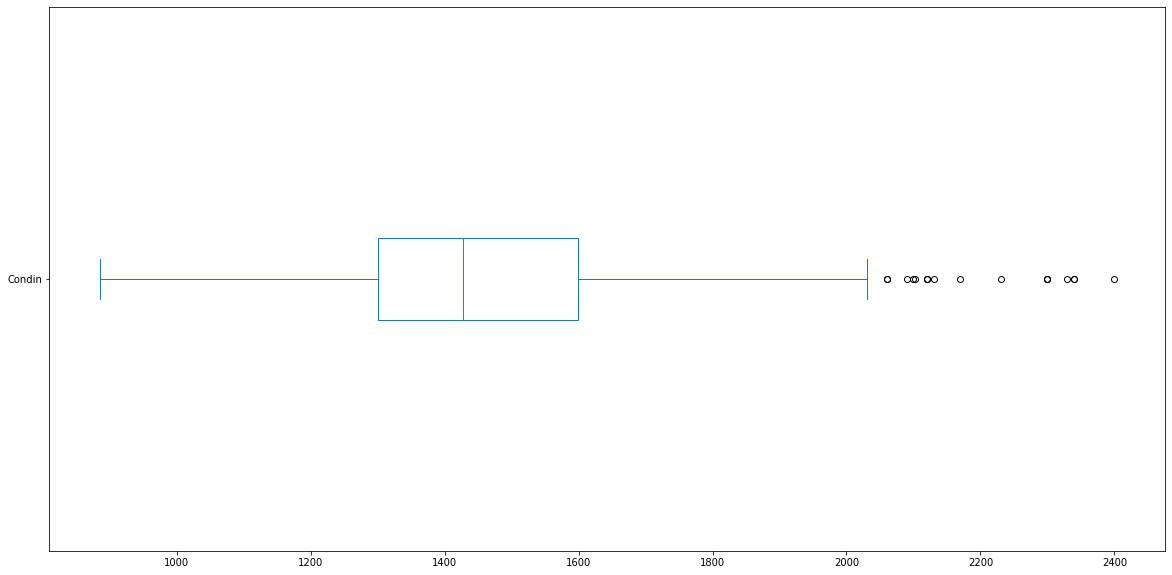

In [ ]:
#Para o Condin
df_clean.Condin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

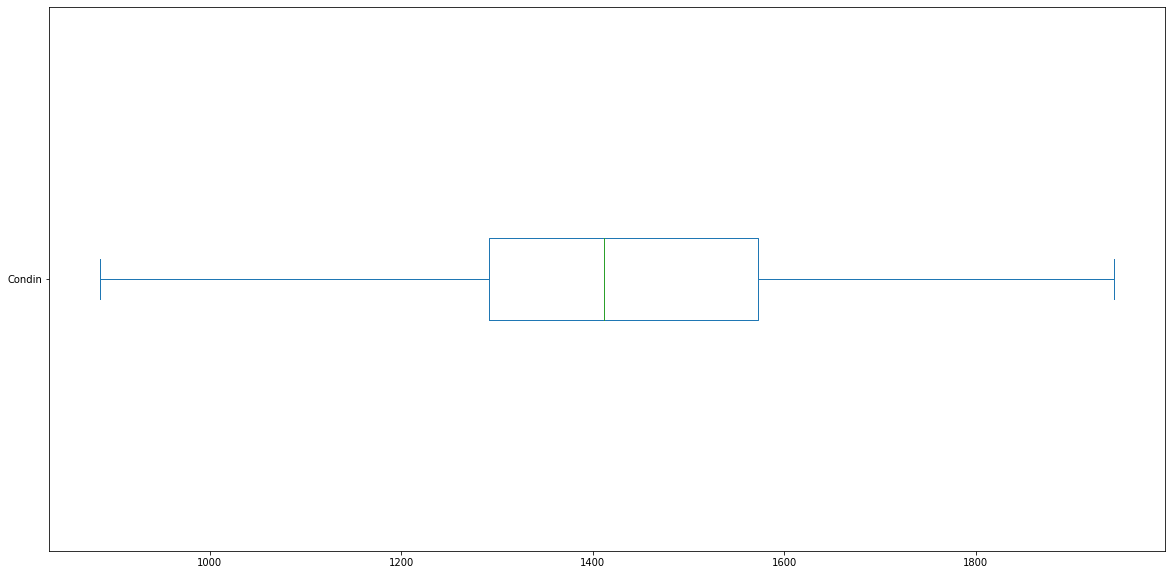

In [ ]:
#Removendo os outliers do Condin
df_clean.drop(df_clean[df_clean.Condin > 1950].index, axis = 0, inplace = True)
df_clean.Condin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

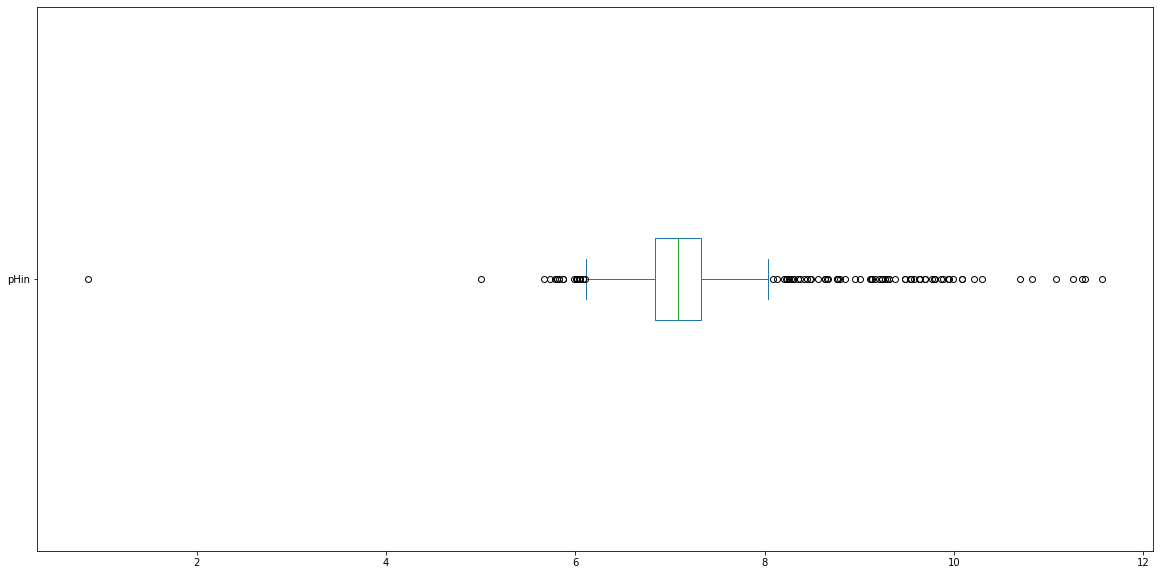

In [ ]:
#Para o pHin
df_clean.pHin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

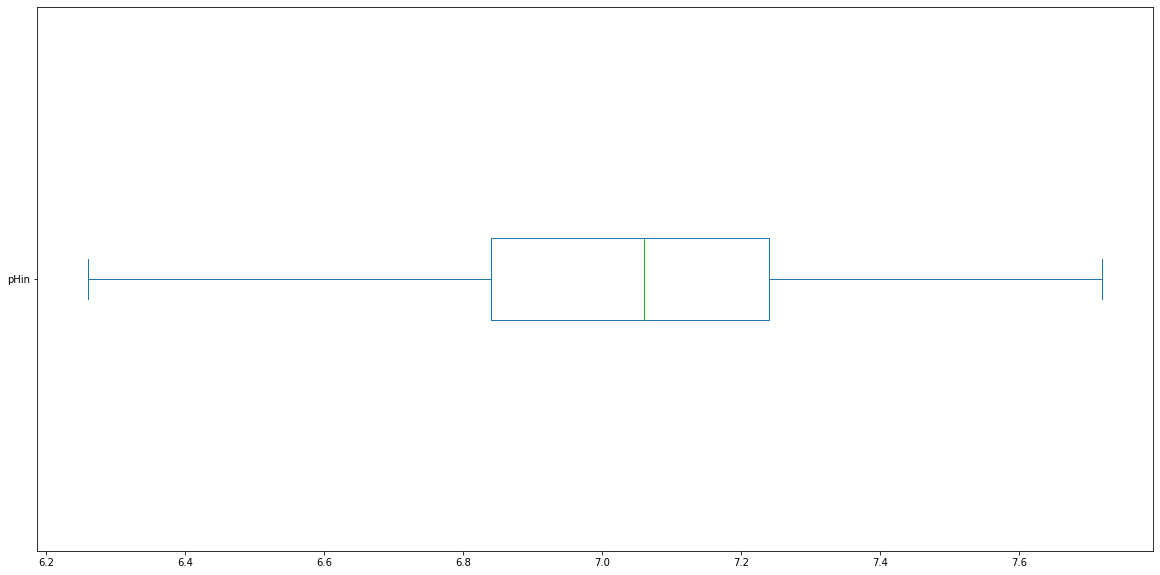

In [ ]:
#Removendo os outliers do pHin
df_clean.drop(df_clean[df_clean.pHin < 6.25].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.pHin > 7.75].index, axis = 0, inplace = True)
df_clean.pHin.plot(kind ='box' , vert = False, figsize = (20,10))
plt.show()

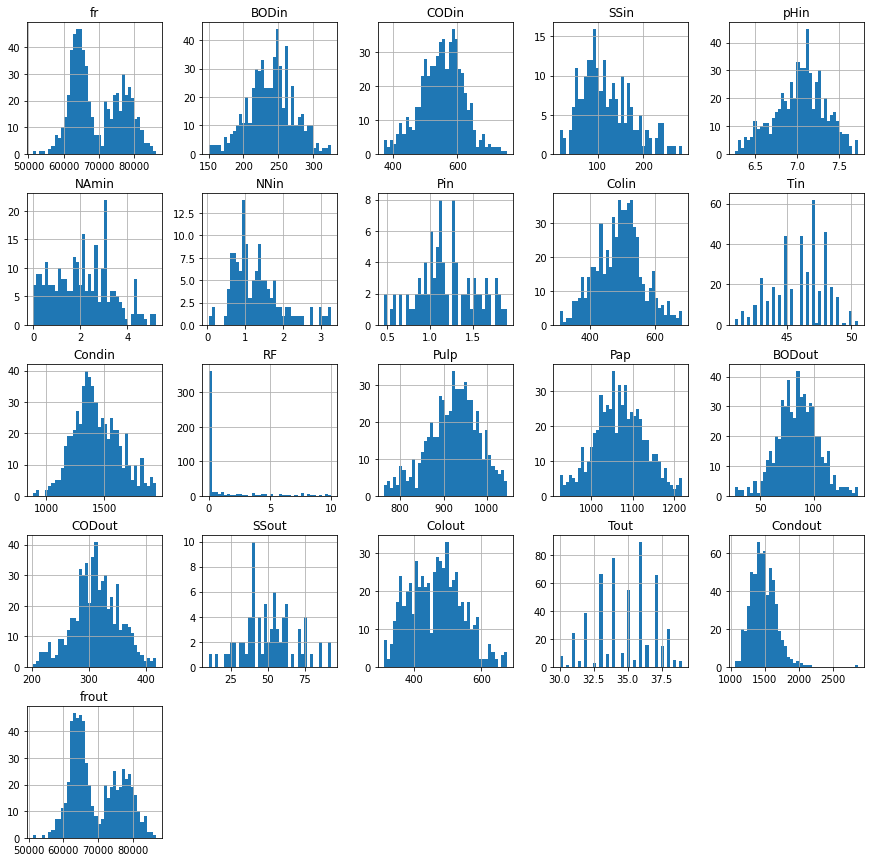

In [ ]:
#Visualizando a distribuição de variáveis para comparar com a extração de outliers
df_clean.hist(bins=40, figsize=(15,15));

In [ ]:
#Analisar os valores ausentes de cada variável por ordem decrescente 
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

SSout      0.8784
Pin        0.8528
NNin       0.7984
SSin       0.6592
NAmin      0.5744
Tin        0.3696
RF         0.1904
Tout       0.1584
BODin      0.0976
CODin      0.0944
BODout     0.0928
CODout     0.0928
Pulp       0.0592
Pap        0.0592
pHin       0.0576
Condin     0.0544
Colin      0.0512
Condout    0.0464
Colout     0.0464
frout      0.0016
fr         0.0000
dtype: float64

In [ ]:
#Preenchendo valores vazios por interpolação
interpolated_df = df_clean.interpolate(method ='linear')
(interpolated_df.isnull().sum() / interpolated_df.shape[0]).sort_values(ascending=False)

Pin        0.0192
NAmin      0.0176
SSin       0.0128
SSout      0.0128
Tout       0.0032
NNin       0.0032
Tin        0.0032
frout      0.0016
Condout    0.0016
Colout     0.0016
CODout     0.0016
BODout     0.0016
Pap        0.0000
fr         0.0000
Pulp       0.0000
RF         0.0000
BODin      0.0000
Colin      0.0000
pHin       0.0000
CODin      0.0000
Condin     0.0000
dtype: float64

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(interpolated_df.describe())

                 fr       BODin       CODin        SSin        pHin  \
count    625.000000  625.000000  625.000000  617.000000  625.000000   
mean   69374.304000  239.355728  552.752000  113.078606    7.029637   
std     7129.433956   32.316702   66.083721   42.027649    0.297151   
min    51309.000000  150.000000  374.000000   16.000000    6.260000   
25%    63569.000000  219.000000  508.000000   86.000000    6.840000   
50%    66860.000000  240.000000  557.000000  105.444444    7.060000   
75%    75829.000000  261.000000  598.000000  137.000000    7.240000   
max    86115.000000  326.000000  752.000000  286.000000    7.720000   

            NAmin        NNin         Pin       Colin         Tin  \
count  614.000000  623.000000  613.000000  625.000000  623.000000   
mean     1.877703    1.292571    1.167333  490.693600   45.929053   
std      1.247250    0.575050    0.297713   71.453628    1.889605   
min      0.000000    0.030000    0.468000  306.000000   41.000000   
25%      0.8000

In [ ]:
df_clean.describe()

,fr,BODin,CODin,SSin,pHin,NAmin,NNin,Pin,Colin,Tin,Condin,RF,Pulp,Pap,BODout,CODout,SSout,Colout,Tout,Condout,frout
count,625.000000,564.000000,566.000000,213.000000,589.000000,266.000000,126.000000,92.000000,593.000000,394.000000,591.000000,506.000000,588.000000,588.000000,567.000000,567.000000,76.000000,596.000000,526.000000,596.000000,624.000000
mean,69374.304000,239.142323,552.047703,119.629108,7.034148,2.082470,1.303317,1.199568,491.433390,46.035025,1434.561760,1.166996,922.510612,1068.490816,85.233157,312.179894,51.105263,466.214765,34.792776,1479.880872,69415.607372
std,7129.433956,32.606418,66.846829,55.507508,0.298859,1.231842,0.658316,0.337040,72.088975,1.982722,197.401928,2.400519,58.466522,59.736240,19.239209,41.038499,17.358632,76.889493,2.057466,186.408806,7127.054646
min,51309.000000,150.000000,374.000000,16.000000,6.260000,0.000000,0.030000,0.468000,306.000000,41.000000,885.000000,0.000000,762.878000,924.100000,26.720000,202.000000,10.000000,312.000000,30.000000,1062.000000,51309.000000
25%,63569.000000,218.750000,507.000000,79.000000,6.840000,1.100000,0.852500,0.997500,439.000000,45.000000,1300.000000,0.000000,884.740000,1027.100000,73.000000,287.000000,40.000000,405.750000,33.000000,1351.750000,63572.750000
50%,66860.000000,240.500000,555.500000,107.000000,7.060000,2.100000,1.160000,1.145000,495.000000,46.000000,1406.000000,0.000000,926.755500,1067.950000,85.000000,312.000000,50.000000,468.500000,35.000000,1464.000000,66897.500000
75%,75829.000000,261.000000,596.750000,154.000000,7.240000,3.000000,1.580000,1.444250,534.000000,47.500000,1568.500000,0.575000,962.519000,1109.825000,98.000000,340.000000,61.250000,520.250000,36.500000,1594.500000,75856.000000
max,86115.000000,326.000000,752.000000,286.000000,7.720000,5.200000,3.280000,1.900000,684.000000,50.500000,1945.000000,10.000000,1046.033000,1219.100000,141.000000,418.000000,93.000000,676.000000,39.000000,2860.000000,86509.000000


# Modelando


## COD

### Todas Variáveis

Desempenho aceitável

R² de 53% e 49%

R² de 3.9% de BOD por COD

##### Entrada

In [ ]:
interpolated_df.dropna(how='any', axis=0, inplace=True)

Xin1 = interpolated_df[['NAmin','NNin', 'Pin', 'SSin', 'Tin', 'Pap', 'fr', 'Pulp', 'RF', 'Colin', 'pHin', 'Condin']]
yin1 = interpolated_df['CODin']

print(Xin1.shape, yin1.shape)

(613, 12) (613,)


In [ ]:
modelin1 = LinearRegression()

Xin1_train, Xin1_test, yin1_train, yin1_test = train_test_split(Xin1, yin1, test_size=0.2, random_state=42)

modelin1.fit(Xin1_train, yin1_train)

y_predin1 = modelin1.predict(Xin1_test)

In [ ]:
coefsin1 = pd.DataFrame({"β0": [modelin1.intercept_],
                       "Namin": [modelin1.coef_[0]],
                       "NNin": [modelin1.coef_[1]],
                       "Pin": [modelin1.coef_[2]],
                       "SSin": [modelin1.coef_[3]],
                       "Tin": [modelin1.coef_[4]],
                       "Pap": [modelin1.coef_[5]],
                       "fr": [modelin1.coef_[6]],
                       "Pulp": [modelin1.coef_[7]],
                       "RF": [modelin1.coef_[8]],
                       "Colin": [modelin1.coef_[9]],
                       "pHin": [modelin1.coef_[10]],
                       "Condin": [modelin1.coef_[11]]})

coefsin1

,β0,Namin,NNin,Pin,SSin,Tin,Pap,fr,Pulp,RF,Colin,pHin,Condin
0,458.998309,3.408214,3.741046,21.36544,0.205305,-2.630955,-0.046372,-0.002138,0.200049,-1.972701,0.343782,-6.506321,0.035688


In [ ]:
errosin1 = pd.DataFrame({"R²": [r2_score(yin1_test, y_predin1)],
                       "MAE": [mean_absolute_error(yin1_test, y_predin1)],
                       "MSE": [mean_squared_error(yin1_test, y_predin1)]})

errosin1

,R²,MAE,MSE
0,0.53181,32.952339,1731.217009


##### Saída

In [ ]:
Xout1 = interpolated_df[['NAmin', 'NNin', 'Pin', 'SSout', 'Tout', 'Pap', 'frout', 'Pulp', 'RF', 'Colout', 'pHin', 'Condout']]
yout1 = interpolated_df['CODout']

print(Xout1.shape, yout1.shape)

(613, 12) (613,)


In [ ]:
modelout1 = LinearRegression()

Xout1_train, Xout1_test, yout1_train, yout1_test = train_test_split(Xout1, yout1, test_size= 0.2, random_state = 42)

modelout1.fit(Xout1_train, yout1_train)

yout1_pred = modelout1.predict(Xout1_test)

In [ ]:
coefsout1 = pd.DataFrame({"β0": [modelout1.intercept_],
                       "Namin": [modelout1.coef_[0]],
                       "NNin": [modelout1.coef_[1]],
                       "Pin": [modelout1.coef_[2]],
                       "SSout": [modelout1.coef_[3]],
                       "Tout": [modelout1.coef_[4]],
                       "Pap": [modelout1.coef_[5]],
                       "frout": [modelout1.coef_[6]],
                       "Pulp": [modelout1.coef_[7]],
                       "RF": [modelout1.coef_[8]],
                       "Colout": [modelout1.coef_[9]],
                       "pHin": [modelout1.coef_[10]],
                       "Condout": [modelout1.coef_[11]]})

coefsout1

,β0,Namin,NNin,Pin,SSout,Tout,Pap,frout,Pulp,RF,Colout,pHin,Condout
0,100.749165,0.523475,2.292097,11.80683,-0.033926,-0.751179,-0.051303,-0.000197,0.099344,-0.62754,0.248449,4.7617,0.035573


In [ ]:
errosout1 = pd.DataFrame({"R²": [r2_score(yout1_test, yout1_pred)],
                       "MAE": [mean_absolute_error(yout1_test, yout1_pred)],
                       "MSE": [mean_squared_error(yout1_test, yout1_pred)]})

errosout1

,R²,MAE,MSE
0,0.499943,21.14299,686.490462


#### BOD a partir de COD
R² de 3,9% e 7,4% respectivamente

##### Entrada

In [ ]:
X_codin1 = interpolated_df['CODin']
y_bodin1 = interpolated_df['BODin']

X_codin1 = X_codin1.values.reshape(-1,1)

print(X_codin1.shape, y_bodin1.shape)

(613, 1) (613,)


In [ ]:
bodin1 = LinearRegression()

X_codin1_train, X_codin1_test, y_bodin1_train, y_bodin1_test = train_test_split(X_codin1, y_bodin1, test_size = 0.2, random_state = 42)

bodin1.fit(X_codin1_train, y_bodin1_train)

y_bodin1_pred = bodin1.predict(X_codin1_test)

In [ ]:
coefsbodin1 = pd.DataFrame({"β0": [bodin1.intercept_],
                            "β1": [bodin1.coef_[0]]})

coefsbodin1

,β0,β1
0,175.977763,0.113354


In [ ]:
errosbodin1 = pd.DataFrame({"R²": [r2_score(y_bodin1_test, y_bodin1_pred)],
                       "MAE": [mean_absolute_error(y_bodin1_test, y_bodin1_pred)],
                       "MSE": [mean_squared_error(y_bodin1_test, y_bodin1_pred)]})

errosbodin1

,R²,MAE,MSE
0,0.039858,22.675368,835.534459


##### Saída

In [ ]:
X_codout1 = interpolated_df['CODout']
y_bodout1 = interpolated_df['BODout']

X_codout1 = X_codout1.values.reshape(-1,1)

print(X_codout1.shape, y_bodout1.shape)

(613, 1) (613,)


In [ ]:
bodout1 = LinearRegression()

X_codout1_train, X_codout1_test, y_bodout1_train, y_bodout1_test = train_test_split(X_codout1, y_bodout1, test_size = 0.2, random_state = 42)

bodout1.fit(X_codout1_train, y_bodout1_train)

y_bodout1_pred = bodout1.predict(X_codout1_test)

In [ ]:
coefsbodout1 = pd.DataFrame({"β0": [bodout1.intercept_],
                            "β1": [bodout1.coef_[0]]})

coefsbodout1

,β0,β1
0,28.477074,0.180514


In [ ]:
errosbodout1 = pd.DataFrame({"R²": [r2_score(y_bodout1_test, y_bodout1_pred)],
                       "MAE": [mean_absolute_error(y_bodout1_test, y_bodout1_pred)],
                       "MSE": [mean_squared_error(y_bodout1_test, y_bodout1_pred)]})

errosbodout1

,R²,MAE,MSE
0,0.074979,12.59911,246.581025


##### Ridge Regression

###### Entrada

In [ ]:
X_codin2 = interpolated_df['CODin']
y_bodin2 = interpolated_df['BODin']

X_codin2 = X_codin2.values.reshape(-1,1)

print(X_codin2.shape, y_bodin2.shape)

(613, 1) (613,)


In [ ]:
bodin2 = Ridge(alpha = 100)

X_codin2_train, X_codin2_test, y_bodin2_train, y_bodin2_test = train_test_split(X_codin2, y_bodin2, test_size = 0.2, random_state = 42)

bodin2.fit(X_codin2_train, y_bodin2_train)

y_bodin2_pred = bodin2.predict(X_codin2_test)

In [ ]:
coefsbodin2 = pd.DataFrame({"β0": [bodin2.intercept_],
                            "β1": [bodin2.coef_[0]]})

coefsbodin2

,β0,β1
0,175.980845,0.113349


In [ ]:
errosbodin2 = pd.DataFrame({"R²": [r2_score(y_bodin2_test, y_bodin2_pred)],
                       "MAE": [mean_absolute_error(y_bodin2_test, y_bodin2_pred)],
                       "MSE": [mean_squared_error(y_bodin2_test, y_bodin2_pred)]})

errosbodin2

,R²,MAE,MSE
0,0.039858,22.675403,835.534656


###### Saída

### 9 Variáveis
#### Tirando Pap, FR, Cond

Desempenho aceitável.

R² de 49% e 47% respectivamente.

##### Entrada

In [ ]:
Xin2 = interpolated_df[['NAmin','NNin', 'Pin', 'SSin', 'Tin', 'Pulp', 'RF', 'Colin', 'pHin']]
yin2 = interpolated_df['CODin']

print(Xin2.shape, yin2.shape)

(613, 9) (613,)


In [ ]:
modelin2 = LinearRegression()

Xin2_train, Xin2_test, yin2_train, yin2_test = train_test_split(Xin2, yin2, test_size=0.2, random_state=42)

modelin2.fit(Xin2_train, yin2_train)

y_predin2 = modelin2.predict(Xin2_test)

In [ ]:
coefsin2 = pd.DataFrame({"β0": [modelin2.intercept_],
                       "Namin": [modelin2.coef_[0]],
                       "NNin": [modelin2.coef_[1]],
                       "Pin": [modelin2.coef_[2]],
                       "SSin": [modelin2.coef_[3]],
                       "Tin": [modelin2.coef_[4]],
                       "Pulp": [modelin2.coef_[5]],
                       "RF": [modelin2.coef_[6]],
                       "Colin": [modelin2.coef_[7]],
                       "pHin": [modelin2.coef_[8]]})

coefsin2

,β0,Namin,NNin,Pin,SSin,Tin,Pulp,RF,Colin,pHin
0,104.374861,6.114484,6.925392,41.962119,0.255522,-0.809256,0.206766,-3.134043,0.402467,0.936562


In [ ]:
errosin2 = pd.DataFrame({"R²": [r2_score(yin2_test, y_predin2)],
                       "MAE": [mean_absolute_error(yin2_test, y_predin2)],
                       "MSE": [mean_squared_error(yin2_test, y_predin2)]})

errosin2

,R²,MAE,MSE
0,0.499773,32.995945,1849.67978


##### Saída

In [ ]:
Xout2 = interpolated_df[['NAmin', 'NNin', 'Pin', 'SSout', 'Tout', 'Pulp', 'RF', 'Colout', 'pHin']]
yout2 = interpolated_df['CODout']

print(Xout2.shape, yout2.shape)

(613, 9) (613,)


In [ ]:
modelout2 = LinearRegression()

Xout2_train, Xout2_test, yout2_train, yout2_test = train_test_split(Xout2, yout2, test_size= 0.2, random_state = 42)

modelout2.fit(Xout2_train, yout2_train)

yout2_pred = modelout2.predict(Xout2_test)

In [ ]:
coefsout2 = pd.DataFrame({"β0": [modelout2.intercept_],
                       "Namin": [modelout2.coef_[0]],
                       "NNin": [modelout2.coef_[1]],
                       "Pin": [modelout2.coef_[2]],
                       "SSout": [modelout2.coef_[3]],
                       "Tout": [modelout2.coef_[4]],
                       "Pulp": [modelout2.coef_[5]],
                       "RF": [modelout2.coef_[6]],
                       "Colout": [modelout2.coef_[7]],
                       "pHin": [modelout2.coef_[8]]})

coefsout2

,β0,Namin,NNin,Pin,SSout,Tout,Pulp,RF,Colout,pHin
0,36.088418,0.510462,1.917153,17.060855,-0.027578,-0.722568,0.091046,-0.516726,0.282516,9.508111


In [ ]:
errosout2 = pd.DataFrame({"R²": [r2_score(yout2_test, yout2_pred)],
                       "MAE": [mean_absolute_error(yout2_test, yout2_pred)],
                       "MSE": [mean_squared_error(yout2_test, yout2_pred)]})

errosout2

,R²,MAE,MSE
0,0.474812,21.637416,720.990589


### 6 Variáveis

#### Tirando SS, Pap, FR, Pulp, Col, Cond

Teve um Desempenho péssimo!

R² de 29% e 22% respectivamente

##### Entrada

In [ ]:
Xin3 = interpolated_df[['NAmin','NNin', 'Pin', 'Tin', 'RF', 'pHin']]
yin3 = interpolated_df['CODin']

print(Xin3.shape, yin3.shape)

(613, 6) (613,)


In [ ]:
modelin3 = LinearRegression()

Xin3_train, Xin3_test, yin3_train, yin3_test = train_test_split(Xin3, yin3, test_size=0.2, random_state=42)

modelin3.fit(Xin3_train, yin3_train)

y_predin3 = modelin3.predict(Xin3_test)

In [ ]:
coefsin3 = pd.DataFrame({"β0": [modelin1.intercept_],
                       "Namin": [modelin1.coef_[0]],
                       "NNin": [modelin1.coef_[1]],
                       "Pin": [modelin1.coef_[2]],
                       "Tin": [modelin1.coef_[3]],
                       "RF": [modelin1.coef_[4]],
                       "pHin": [modelin1.coef_[5]]})

coefsin3

,β0,Namin,NNin,Pin,Tin,RF,pHin
0,458.998309,3.408214,3.741046,21.36544,0.205305,-2.630955,-0.046372


In [ ]:
errosin3 = pd.DataFrame({"R²": [r2_score(yin3_test, y_predin3)],
                       "MAE": [mean_absolute_error(yin3_test, y_predin3)],
                       "MSE": [mean_squared_error(yin3_test, y_predin3)]})

errosin3

,R²,MAE,MSE
0,0.298688,39.890694,2593.226415


##### Saída

In [ ]:
Xout3 = interpolated_df[['NAmin', 'NNin', 'Pin', 'Tout', 'RF', 'pHin']]
yout3 = interpolated_df['CODout']

print(Xout3.shape, yout3.shape)

(613, 6) (613,)


In [ ]:
modelout3 = LinearRegression()

Xout3_train, Xout3_test, yout3_train, yout3_test = train_test_split(Xout3, yout3, test_size= 0.2, random_state = 42)

modelout3.fit(Xout3_train, yout3_train)

yout3_pred = modelout3.predict(Xout3_test)

In [ ]:
coefsout3 = pd.DataFrame({"β0": [modelout3.intercept_],
                       "Namin": [modelout3.coef_[0]],
                       "NNin": [modelout3.coef_[1]],
                       "Pin": [modelout3.coef_[2]],
                       "Tout": [modelout3.coef_[3]],
                       "RF": [modelout3.coef_[4]],
                       "pHin": [modelout3.coef_[5]]})

coefsout3

,β0,Namin,NNin,Pin,Tout,RF,pHin
0,108.387232,4.859501,12.341287,23.944517,2.150531,-1.882143,11.394918


In [ ]:
errosout3 = pd.DataFrame({"R²": [r2_score(yout3_test, yout3_pred)],
                       "MAE": [mean_absolute_error(yout3_test, yout3_pred)],
                       "MSE": [mean_squared_error(yout3_test, yout3_pred)]})

errosout3

,R²,MAE,MSE
0,0.226332,25.811161,1062.111174


### 5 Variáveis

#### Tirando NAM, NN, P, SS, RF, Col, Cond

R² de 34% e 19% respectivamente

##### Entrada

In [ ]:
Xin4 = interpolated_df[['Tin', 'Pap', 'fr', 'Pulp', 'pHin']]
yin4 = interpolated_df['CODin']

print(Xin4.shape, yin4.shape)

(613, 5) (613,)


In [ ]:
modelin4 = LinearRegression()

Xin4_train, Xin4_test, yin4_train, yin4_test = train_test_split(Xin4, yin4, test_size=0.2, random_state=42)

modelin4.fit(Xin4_train, yin4_train)

y_predin4 = modelin4.predict(Xin4_test)

In [ ]:
coefsin4 = pd.DataFrame({"β0": [modelin4.intercept_],
                       "Tin": [modelin4.coef_[0]],
                       "Pap": [modelin4.coef_[1]],
                       "fr": [modelin4.coef_[2]],
                       "Pulp": [modelin4.coef_[3]],
                       "pHin": [modelin4.coef_[4]]})

coefsin4

,β0,Tin,Pap,fr,Pulp,pHin
0,692.437735,-0.449836,-0.01822,-0.004801,0.211294,5.797129


In [ ]:
errosin4 = pd.DataFrame({"R²": [r2_score(yin4_test, y_predin4)],
                       "MAE": [mean_absolute_error(yin4_test, y_predin4)],
                       "MSE": [mean_squared_error(yin4_test, y_predin4)]})

errosin4

,R²,MAE,MSE
0,0.341315,37.77328,2435.606586


##### Saída

In [ ]:
Xout4 = interpolated_df[['Tout', 'Pap', 'frout', 'Pulp', 'pHin']]
yout4 = interpolated_df['CODout']

print(Xout4.shape, yout4.shape)

(613, 5) (613,)


In [ ]:
modelout4 = LinearRegression()

Xout4_train, Xout4_test, yout4_train, yout4_test = train_test_split(Xout4, yout4, test_size= 0.2, random_state = 42)

modelout4.fit(Xout4_train, yout4_train)

yout4_pred = modelout4.predict(Xout4_test)

In [ ]:
coefsout4 = pd.DataFrame({"β0": [modelout4.intercept_],
                       "Tout": [modelout4.coef_[0]],
                       "Pap": [modelout4.coef_[1]],
                       "frout": [modelout4.coef_[2]],
                       "Pulp": [modelout4.coef_[3]],
                       "pHin": [modelout4.coef_[4]]})

coefsout4

,β0,Tout,Pap,frout,Pulp,pHin
0,266.499084,1.800291,-0.019942,-0.002075,0.087496,9.8806


In [ ]:
errosout4 = pd.DataFrame({"R²": [r2_score(yout4_test, yout4_pred)],
                       "MAE": [mean_absolute_error(yout4_test, yout4_pred)],
                       "MSE": [mean_squared_error(yout4_test, yout4_pred)]})

errosout4

,R²,MAE,MSE
0,0.194487,26.332505,1105.828315


## BOD

### Todas Variáveis

R² de 20% e 30% respectivamente

##### Entrada

In [ ]:
Xin5 = interpolated_df[['NAmin','NNin', 'Pin', 'SSin', 'Tin', 'Pap', 'fr', 'Pulp', 'RF', 'Colin', 'pHin', 'Condin', 'CODin']]
yin5 = interpolated_df['BODin']

print(Xin5.shape, yin5.shape)

(613, 13) (613,)


In [ ]:
modelin5 = LinearRegression()

Xin5_train, Xin5_test, yin5_train, yin5_test = train_test_split(Xin5, yin5, test_size=0.2, random_state=42)

modelin5.fit(Xin5_train, yin5_train)

y_predin5 = modelin5.predict(Xin5_test)

In [ ]:
coefsin5 = pd.DataFrame({"β0": [modelin5.intercept_],
                       "Namin": [modelin5.coef_[0]],
                       "NNin": [modelin5.coef_[1]],
                       "Pin": [modelin5.coef_[2]],
                       "SSin": [modelin5.coef_[3]],
                       "Tin": [modelin5.coef_[4]],
                       "Pap": [modelin5.coef_[5]],
                       "fr": [modelin5.coef_[6]],
                       "Pulp": [modelin5.coef_[7]],
                       "RF": [modelin5.coef_[8]],
                       "Colin": [modelin5.coef_[9]],
                       "pHin": [modelin5.coef_[10]],
                       "Condin": [modelin5.coef_[11]],
                       "CODin": [modelin5.coef_[12]]})

coefsin5

,β0,Namin,NNin,Pin,SSin,Tin,Pap,fr,Pulp,RF,Colin,pHin,Condin,CODin
0,293.817046,-0.582927,-3.894794,9.645077,-0.019288,-3.972625,-0.045554,0.001046,0.032988,-0.426652,0.00896,-3.178343,-0.010932,0.189408


In [ ]:
errosin5 = pd.DataFrame({"R²": [r2_score(yin5_test, y_predin5)],
                       "MAE": [mean_absolute_error(yin5_test, y_predin5)],
                       "MSE": [mean_squared_error(yin5_test, y_predin5)]})

errosin5

,R²,MAE,MSE
0,0.202142,20.759488,694.312175


##### Saída

In [ ]:
Xout5 = interpolated_df[['NAmin', 'NNin', 'Pin', 'SSout', 'Tout', 'Pap', 'frout', 'Pulp', 'RF', 'Colout', 'pHin', 'Condout', 'CODout']]
yout5 = interpolated_df['BODout']

print(Xout5.shape, yout5.shape)

(613, 13) (613,)


In [ ]:
modelout5 = LinearRegression()

Xout5_train, Xout5_test, yout5_train, yout5_test = train_test_split(Xout5, yout5, test_size= 0.2, random_state = 42)

modelout5.fit(Xout5_train, yout5_train)

yout5_pred = modelout5.predict(Xout5_test)

In [ ]:
coefsout5 = pd.DataFrame({"β0": [modelout5.intercept_],
                       "Namin": [modelout5.coef_[0]],
                       "NNin": [modelout5.coef_[1]],
                       "Pin": [modelout5.coef_[2]],
                       "SSout": [modelout5.coef_[3]],
                       "Tout": [modelout5.coef_[4]],
                       "Pap": [modelout5.coef_[5]],
                       "frout": [modelout5.coef_[6]],
                       "Pulp": [modelout5.coef_[7]],
                       "RF": [modelout5.coef_[8]],
                       "Colout": [modelout5.coef_[9]],
                       "pHin": [modelout5.coef_[10]],
                       "Condout": [modelout5.coef_[11]],
                       "CODout": [modelout5.coef_[12]]})

coefsout5

,β0,Namin,NNin,Pin,SSout,Tout,Pap,frout,Pulp,RF,Colout,pHin,Condout,CODout
0,-10.359244,-1.252501,-0.556833,-2.595417,0.235222,-0.831564,-0.029675,0.000969,0.012476,-0.50777,-0.033394,-0.342953,-0.002519,0.299533


In [ ]:
errosout5 = pd.DataFrame({"R²": [r2_score(yout5_test, yout5_pred)],
                       "MAE": [mean_absolute_error(yout5_test, yout5_pred)],
                       "MSE": [mean_squared_error(yout5_test, yout5_pred)]})

errosout5

,R²,MAE,MSE
0,0.300106,10.856396,186.569423


### 9 Variáveis

#### Tirando SS, P,  NN, NAm

R² de 19% e 29% respectivamente

##### Entrada

In [ ]:
Xin6 = interpolated_df[['Tin', 'Pap', 'fr', 'Pulp', 'RF', 'Colin', 'pHin', 'Condin', 'CODin']]
yin6 = interpolated_df['BODin']

print(Xin6.shape, yin6.shape)

(613, 9) (613,)


In [ ]:
modelin6 = LinearRegression()

Xin6_train, Xin6_test, yin6_train, yin6_test = train_test_split(Xin6, yin6, test_size=0.2, random_state=42)

modelin6.fit(Xin6_train, yin6_train)

y_predin6 = modelin6.predict(Xin6_test)

In [ ]:
coefsin6 = pd.DataFrame({"β0": [modelin6.intercept_],
                       "Tin": [modelin6.coef_[0]],
                       "Pap": [modelin6.coef_[1]],
                       "fr": [modelin6.coef_[2]],
                       "Pulp": [modelin6.coef_[3]],
                       "RF": [modelin6.coef_[4]],
                       "Colin": [modelin6.coef_[5]],
                       "pHin": [modelin6.coef_[6]],
                       "Condin": [modelin6.coef_[7]],
                       "CODin": [modelin6.coef_[8]]})

coefsin6

,β0,Tin,Pap,fr,Pulp,RF,Colin,pHin,Condin,CODin
0,324.394102,-4.270249,-0.044623,0.000931,0.031176,-0.594415,-0.000733,-3.104583,-0.011266,0.188683


In [ ]:
errosin6 = pd.DataFrame({"R²": [r2_score(yin6_test, y_predin6)],
                       "MAE": [mean_absolute_error(yin6_test, y_predin6)],
                       "MSE": [mean_squared_error(yin6_test, y_predin6)]})

errosin6

,R²,MAE,MSE
0,0.195332,20.462396,700.237739


##### Saída

In [ ]:
Xout6 = interpolated_df[['Tout', 'Pap', 'frout', 'Pulp', 'RF', 'Colout', 'pHin', 'Condout', 'CODout']]
yout6 = interpolated_df['BODout']

print(Xout6.shape, yout6.shape)

(613, 9) (613,)


In [ ]:
modelout6 = LinearRegression()

Xout6_train, Xout6_test, yout6_train, yout6_test = train_test_split(Xout6, yout6, test_size= 0.2, random_state = 42)

modelout6.fit(Xout6_train, yout6_train)

yout6_pred = modelout6.predict(Xout6_test)

In [ ]:
coefsout6 = pd.DataFrame({"β0": [modelout6.intercept_],
                       "Tout": [modelout6.coef_[0]],
                       "Pap": [modelout6.coef_[1]],
                       "frout": [modelout6.coef_[2]],
                       "Pulp": [modelout6.coef_[3]],
                       "RF": [modelout6.coef_[4]],
                       "Colout": [modelout6.coef_[5]],
                       "pHin": [modelout6.coef_[6]],
                       "Condout": [modelout6.coef_[7]],
                       "CODout": [modelout6.coef_[8]]})

coefsout6

,β0,Tout,Pap,frout,Pulp,RF,Colout,pHin,Condout,CODout
0,-31.828604,-0.586461,-0.032695,0.00125,0.018224,-0.434661,-0.042077,-0.186213,-0.001178,0.294792


In [ ]:
errosout6 = pd.DataFrame({"R²": [r2_score(yout6_test, yout6_pred)],
                       "MAE": [mean_absolute_error(yout6_test, yout6_pred)],
                       "MSE": [mean_squared_error(yout6_test, yout6_pred)]})

errosout6

,R²,MAE,MSE
0,0.301501,11.032444,186.197515


### 6 Variáveis

#### Tirando SS, P,  NN, NAm, RF, Col, Cond

R² de 19% e 29% respectivamente

##### Entrada

In [ ]:
Xin7 = interpolated_df[['Tin', 'Pap', 'fr', 'Pulp', 'pHin', 'CODin']]
yin7 = interpolated_df['BODin']

print(Xin7.shape, yin7.shape)

(613, 6) (613,)


In [ ]:
modelin7 = LinearRegression()

Xin7_train, Xin7_test, yin7_train, yin7_test = train_test_split(Xin7, yin7, test_size=0.2, random_state=42)

modelin7.fit(Xin7_train, yin7_train)

y_predin7 = modelin7.predict(Xin7_test)

In [ ]:
coefsin7 = pd.DataFrame({"β0": [modelin7.intercept_],
                       "Tin": [modelin7.coef_[0]],
                       "Pap": [modelin7.coef_[1]],
                       "fr": [modelin7.coef_[2]],
                       "Pulp": [modelin7.coef_[3]],
                       "pHin": [modelin7.coef_[4]],
                       "CODin": [modelin7.coef_[5]]})

coefsin7

,β0,Tin,Pap,fr,Pulp,pHin,CODin
0,339.782818,-4.665746,-0.044398,0.000933,0.033322,-4.958627,0.181833


In [ ]:
errosin7 = pd.DataFrame({"R²": [r2_score(yin7_test, y_predin7)],
                       "MAE": [mean_absolute_error(yin7_test, y_predin7)],
                       "MSE": [mean_squared_error(yin7_test, y_predin7)]})

errosin7

,R²,MAE,MSE
0,0.192572,20.508698,702.639891


##### Saída

In [ ]:
Xout7 = interpolated_df[['Tout', 'Pap', 'frout', 'Pulp', 'pHin', 'CODout']]
yout7 = interpolated_df['BODout']

print(Xout7.shape, yout7.shape)

(613, 6) (613,)


In [ ]:
modelout7 = LinearRegression()

Xout7_train, Xout7_test, yout7_train, yout7_test = train_test_split(Xout7, yout7, test_size= 0.2, random_state = 42)

modelout7.fit(Xout7_train, yout7_train)

yout7_pred = modelout7.predict(Xout7_test)

In [ ]:
coefsout7 = pd.DataFrame({"β0": [modelout7.intercept_],
                       "Tout": [modelout7.coef_[0]],
                       "Pap": [modelout7.coef_[1]],
                       "frout": [modelout7.coef_[2]],
                       "Pulp": [modelout7.coef_[3]],
                       "pHin": [modelout7.coef_[4]],
                       "CODout": [modelout7.coef_[5]]})

coefsout7

,β0,Tout,Pap,frout,Pulp,pHin,CODout
0,-33.975795,-1.091773,-0.03707,0.001331,0.025921,0.11698,0.255876


In [ ]:
errosout7 = pd.DataFrame({"R²": [r2_score(yout7_test, yout7_pred)],
                       "MAE": [mean_absolute_error(yout7_test, yout7_pred)],
                       "MSE": [mean_squared_error(yout7_test, yout7_pred)]})

errosout7

,R²,MAE,MSE
0,0.291142,11.228111,188.958845


### 5 Variáveis

#### Tirando SS, P,  NN, NAm, RF, Col, Cond e Pap

R² de 17% e 29% respectivamente

##### Entrada

In [ ]:
Xin8 = interpolated_df[['Tin', 'fr', 'Pulp', 'pHin', 'CODin']]
yin8 = interpolated_df['BODin']

print(Xin8.shape, yin8.shape)

(613, 5) (613,)


In [ ]:
modelin8 = LinearRegression()

Xin8_train, Xin8_test, yin8_train, yin8_test = train_test_split(Xin8, yin8, test_size=0.2, random_state=42)

modelin8.fit(Xin8_train, yin8_train)

y_predin8 = modelin8.predict(Xin8_test)

In [ ]:
coefsin8 = pd.DataFrame({"β0": [modelin8.intercept_],
                       "Tin": [modelin8.coef_[0]],
                       "fr": [modelin8.coef_[1]],
                       "Pulp": [modelin8.coef_[2]],
                       "pHin": [modelin8.coef_[3]],
                       "CODin": [modelin8.coef_[4]]})

coefsin8

,β0,Tin,fr,Pulp,pHin,CODin
0,301.520108,-4.754748,0.001022,0.022859,-5.262459,0.182652


In [ ]:
errosin8 = pd.DataFrame({"R²": [r2_score(yin8_test, y_predin8)],
                       "MAE": [mean_absolute_error(yin8_test, y_predin8)],
                       "MSE": [mean_squared_error(yin8_test, y_predin8)]})

errosin8

,R²,MAE,MSE
0,0.173639,20.58716,719.115346


##### Saída

In [ ]:
Xout8 = interpolated_df[['Tout', 'frout', 'Pulp', 'pHin', 'CODout']]
yout8 = interpolated_df['BODout']

print(Xout8.shape, yout8.shape)

(613, 5) (613,)


In [ ]:
modelout8 = LinearRegression()

Xout8_train, Xout8_test, yout8_train, yout8_test = train_test_split(Xout8, yout8, test_size= 0.2, random_state = 42)

modelout8.fit(Xout8_train, yout8_train)

yout8_pred = modelout8.predict(Xout8_test)

In [ ]:
coefsout8 = pd.DataFrame({"β0": [modelout8.intercept_],
                       "Tout": [modelout8.coef_[0]],
                       "frout": [modelout8.coef_[1]],
                       "Pulp": [modelout8.coef_[2]],
                       "pHin": [modelout8.coef_[3]],
                       "CODout": [modelout8.coef_[4]]})

coefsout8

,β0,Tout,frout,Pulp,pHin,CODout
0,-67.460006,-1.173626,0.001418,0.017153,-0.123282,0.257333


In [ ]:
errosout8 = pd.DataFrame({"R²": [r2_score(yout8_test, yout8_pred)],
                       "MAE": [mean_absolute_error(yout8_test, yout8_pred)],
                       "MSE": [mean_squared_error(yout8_test, yout8_pred)]})

errosout8

,R²,MAE,MSE
0,0.294498,11.117818,188.064347
